---

## 1.Problem Definition

Predict the Global_Sale
1. Analyse the importance of features that can be of help in increasing the global sales
2. If the Japanese developer, Nintendo, wants to create a new game and promote it to the global market, what should they consider?

---

## 2.Dataset Preview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
videoGames=pd.read_csv("Video_Games.csv")
videoGames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


---

## 3.Data Cleaning / Preparation

In [4]:
videoGamesSelected=pd.DataFrame(videoGames[['Platform','Genre','Publisher','Critic_Score','Global_Sales','User_Score','Rating', 'JP_Sales']])
videoGamesSelected = videoGamesSelected[videoGamesSelected.User_Score != "tbd"]
videoGamesSelected["User_Score"] = pd.to_numeric(videoGamesSelected["User_Score"])
videoGamesSelected

,Platform,Genre,Publisher,Critic_Score,Global_Sales,User_Score,Rating,JP_Sales
0,Wii,Sports,Nintendo,76.0,82.53,8.0,E,3.77
1,NES,Platform,Nintendo,NaN,40.24,NaN,NaN,6.81
2,Wii,Racing,Nintendo,82.0,35.52,8.3,E,3.79
3,Wii,Sports,Nintendo,80.0,32.77,8.0,E,3.28
4,GB,Role-Playing,Nintendo,NaN,31.37,NaN,NaN,10.22
...,...,...,...,...,...,...,...,...
16714,PS3,Action,Tecmo Koei,NaN,0.01,NaN,NaN,0.01
16715,X360,Sports,Codemasters,NaN,0.01,NaN,NaN,0.00
16716,PSV,Adventure,Idea Factory,NaN,0.01,NaN,NaN,0.01
16717,GBA,Platform,Wanadoo,NaN,0.01,NaN,NaN,0.00


In [5]:
for i in videoGamesSelected:
    print(i, videoGamesSelected[i].isnull().sum())

Platform 0
Genre 2
Publisher 52
Critic_Score 7239
Global_Sales 0
User_Score 6704
Rating 6719
JP_Sales 0


In [6]:
videoGamesSelectedCleaned=pd.DataFrame(videoGamesSelected[~videoGamesSelected
                                                          ['Critic_Score'].isnull() &
                                                         ~videoGamesSelected
                                                          ['Publisher'].isnull() &
                                                         ~videoGamesSelected
                                                          ['Genre'].isnull() &
                                                          ~videoGamesSelected
                                                          ['User_Score'].isnull() &
                                                          ~videoGamesSelected
                                                          ['Rating'].isnull() &
                                                          ~videoGamesSelected
                                                          ['JP_Sales'].isnull()])
videoGamesSelectedCleaned

,Platform,Genre,Publisher,Critic_Score,Global_Sales,User_Score,Rating,JP_Sales
0,Wii,Sports,Nintendo,76.0,82.53,8.0,E,3.77
2,Wii,Racing,Nintendo,82.0,35.52,8.3,E,3.79
3,Wii,Sports,Nintendo,80.0,32.77,8.0,E,3.28
6,DS,Platform,Nintendo,89.0,29.80,8.5,E,6.50
7,Wii,Misc,Nintendo,58.0,28.92,6.6,E,2.93
...,...,...,...,...,...,...,...,...
16667,GBA,Action,NewKidCo,46.0,0.01,2.4,E,0.00
16677,GBA,Fighting,Midway Games,81.0,0.01,8.8,M,0.00
16696,PC,Action,Konami Digital Entertainment,80.0,0.01,7.6,M,0.00
16700,PC,Shooter,Destineer,61.0,0.01,5.8,T,0.00


In [7]:
for i in videoGamesSelectedCleaned:
    print(i, videoGamesSelectedCleaned[i].isnull().sum())

Platform 0
Genre 0
Publisher 0
Critic_Score 0
Global_Sales 0
User_Score 0
Rating 0
JP_Sales 0


---

## 4.Data Analysis / Visualisation

### Visualisation for Rating

In [8]:
videoGamesSelectedCleaned['Rating'].unique()

array(['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'], dtype=object)

### Visualisation for Genre

In [9]:
videoGamesSelectedCleaned['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

### Visualisation for Platform

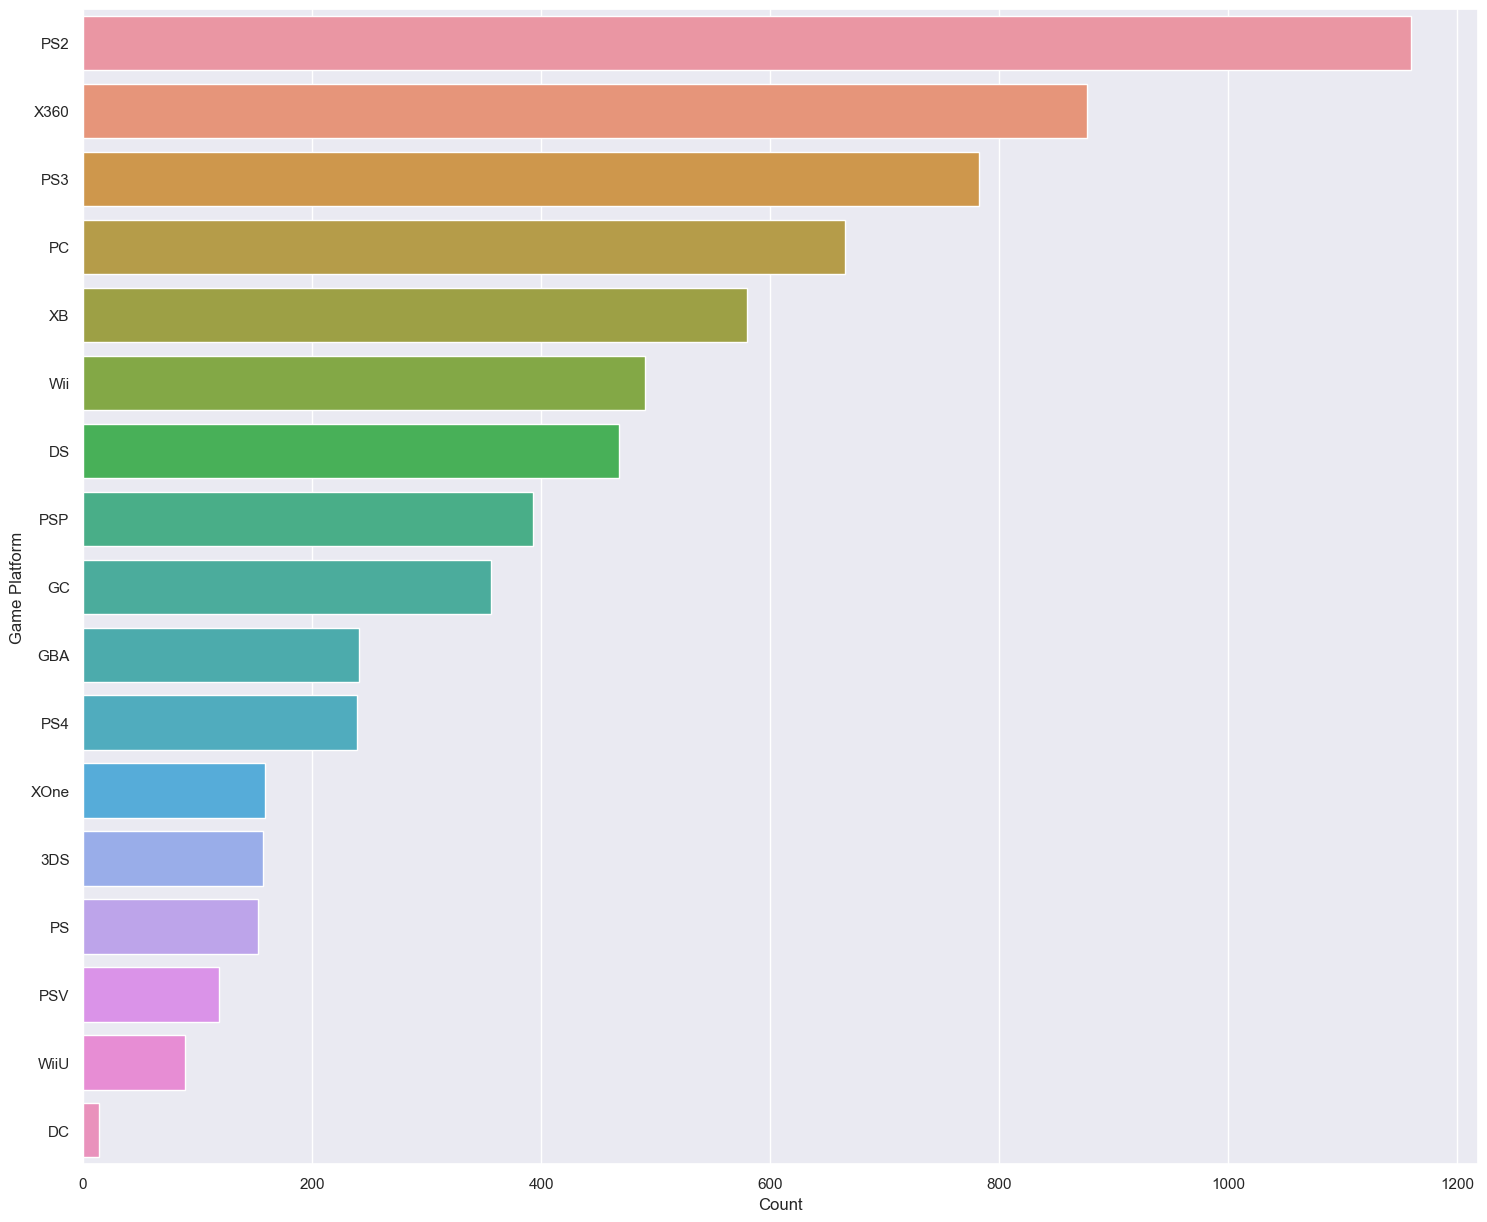

In [10]:
platform_count = pd.DataFrame()
platform_count = videoGamesSelectedCleaned.loc[:,'Platform'].value_counts()
platform_count = platform_count.to_frame()
platform_count['Game Platform'] = platform_count.index
platform_count = platform_count.rename(columns = {'Platform' : 'Count'})

plt.figure(figsize=(18, 15))
sb.set(font_scale = 1)
sb.barplot(data = platform_count, x = 'Count', y = 'Game Platform')
plt.show()

### visualisation for Publisher

In [11]:
videoGamesSelectedCleaned['Publisher'].nunique()
videoGamesSelectedCleaned['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'SquareSoft',
       'GT Interactive', 'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', '505 Games', 'Capcom',
       'Warner Bros. Interactive Entertainment', 'Universal Interactive',
       'RedOctane', 'Atari', 'Eidos Interactive', 'Namco Bandai Games',
       'Vivendi Games', 'MTV Games', 'Sega', 'THQ',
       'Disney Interactive Studios', 'Acclaim Entertainment',
       'Midway Games', 'Deep Silver', 'NCSoft', 'Tecmo Koei',
       'Valve Software', 'Infogrames', 'Mindscape', 'Valve',
       'Hello Games', 'Global Star', 'Gotham Games',
       'Crave Entertainment', 'Hasbro Interactive', 'Codemasters',
       'TDK Mediactive', 'Zoo Games', 'Sony Online Entertainment', 'RTL',
       'D3Publisher', 'Unknown', 'Black Label G

In [12]:
videoGamesPublisher=videoGamesSelectedCleaned.groupby('Publisher')
videoGamesPublisher=videoGamesPublisher.filter(lambda x:len(x)>=50)
videoGamesPublisher

,Platform,Genre,Publisher,Critic_Score,Global_Sales,User_Score,Rating,JP_Sales
0,Wii,Sports,Nintendo,76.0,82.53,8.0,E,3.77
2,Wii,Racing,Nintendo,82.0,35.52,8.3,E,3.79
3,Wii,Sports,Nintendo,80.0,32.77,8.0,E,3.28
6,DS,Platform,Nintendo,89.0,29.80,8.5,E,6.50
7,Wii,Misc,Nintendo,58.0,28.92,6.6,E,2.93
...,...,...,...,...,...,...,...,...
16644,PC,Strategy,Codemasters,51.0,0.01,3.8,E10+,0.00
16656,WiiU,Action,Nintendo,81.0,0.01,8.5,E,0.00
16677,GBA,Fighting,Midway Games,81.0,0.01,8.8,M,0.00
16696,PC,Action,Konami Digital Entertainment,80.0,0.01,7.6,M,0.00


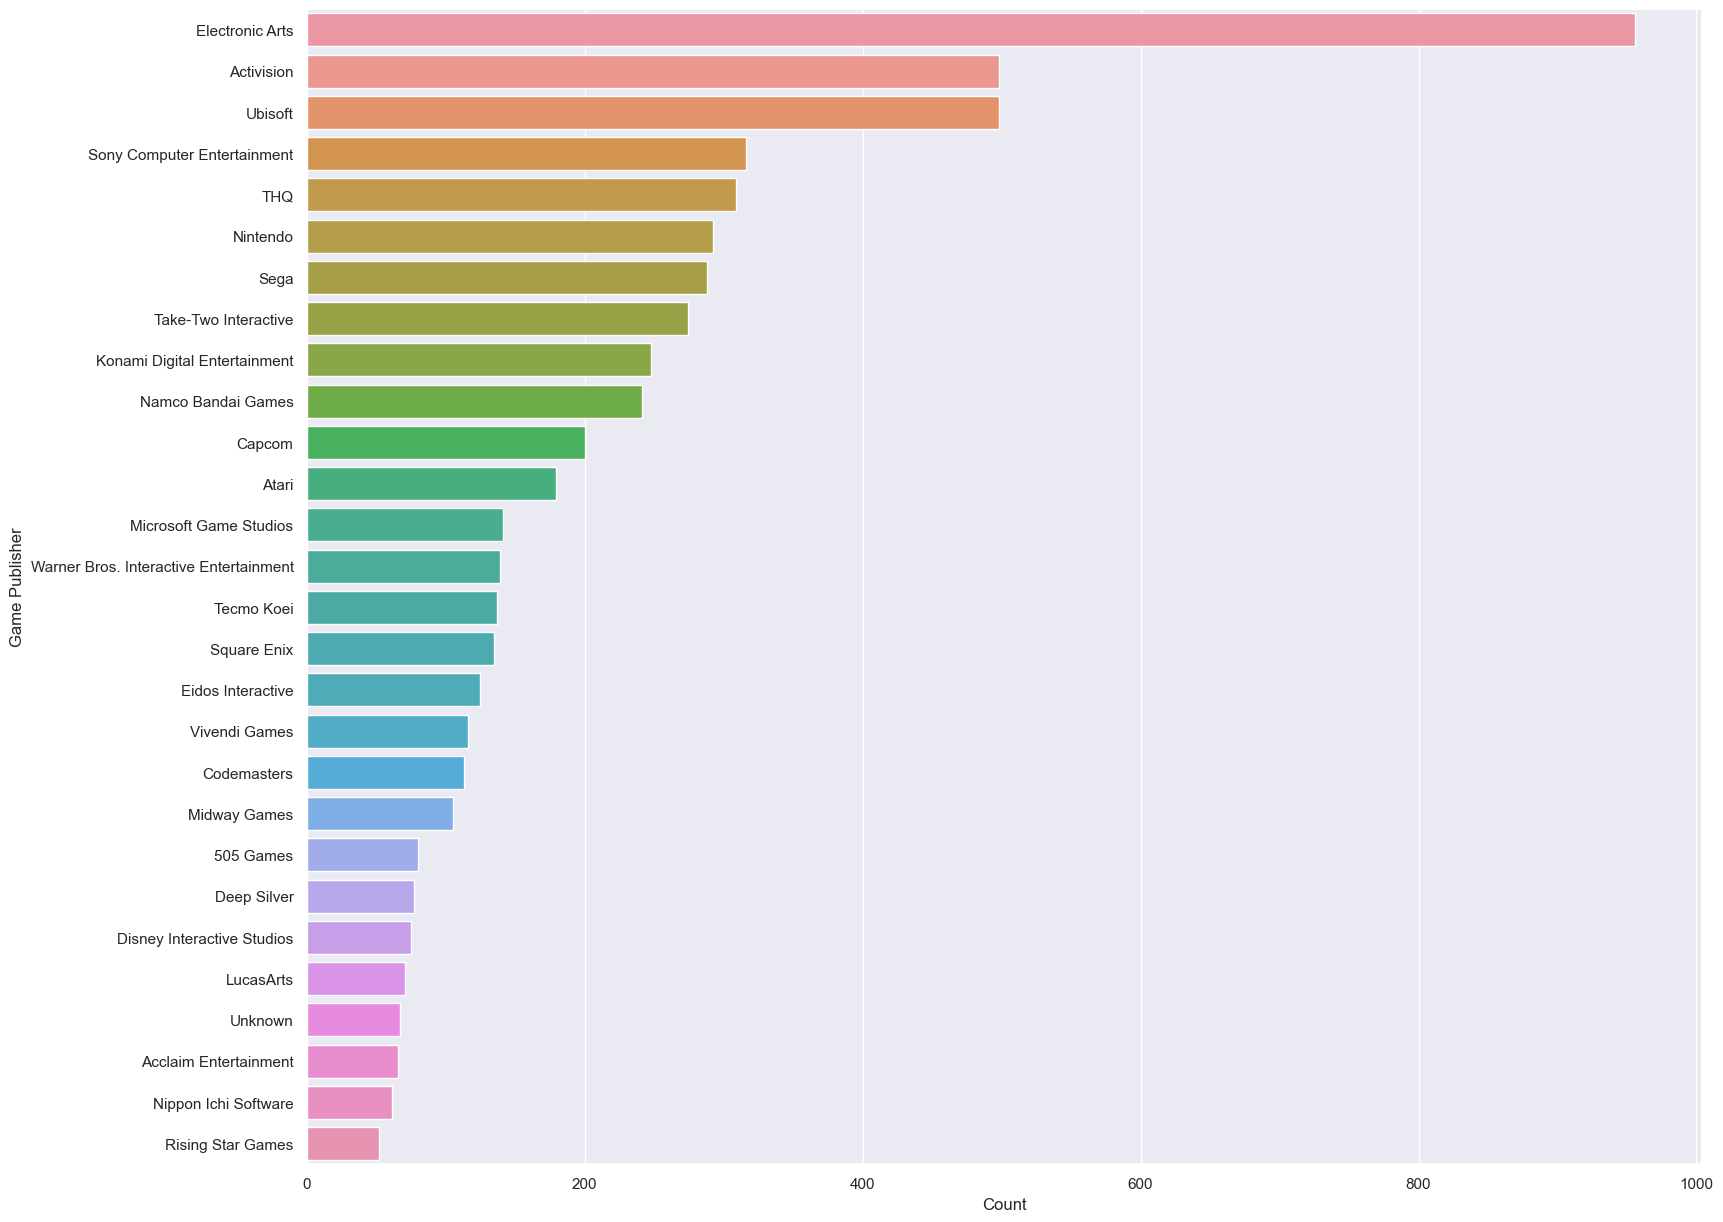

In [13]:
publisher_count = pd.DataFrame()
publisher_count = videoGamesPublisher.loc[:,'Publisher'].value_counts()
publisher_count = publisher_count.to_frame()
publisher_count['Game Publisher'] = publisher_count.index
publisher_count = publisher_count.rename(columns = {'Publisher' : 'Count'})

plt.figure(figsize=(18, 15))
sb.set(font_scale = 1)
sb.barplot(data = publisher_count, x = 'Count', y = 'Game Publisher')
plt.show()

<AxesSubplot:xlabel='Global_Sales', ylabel='Publisher'>

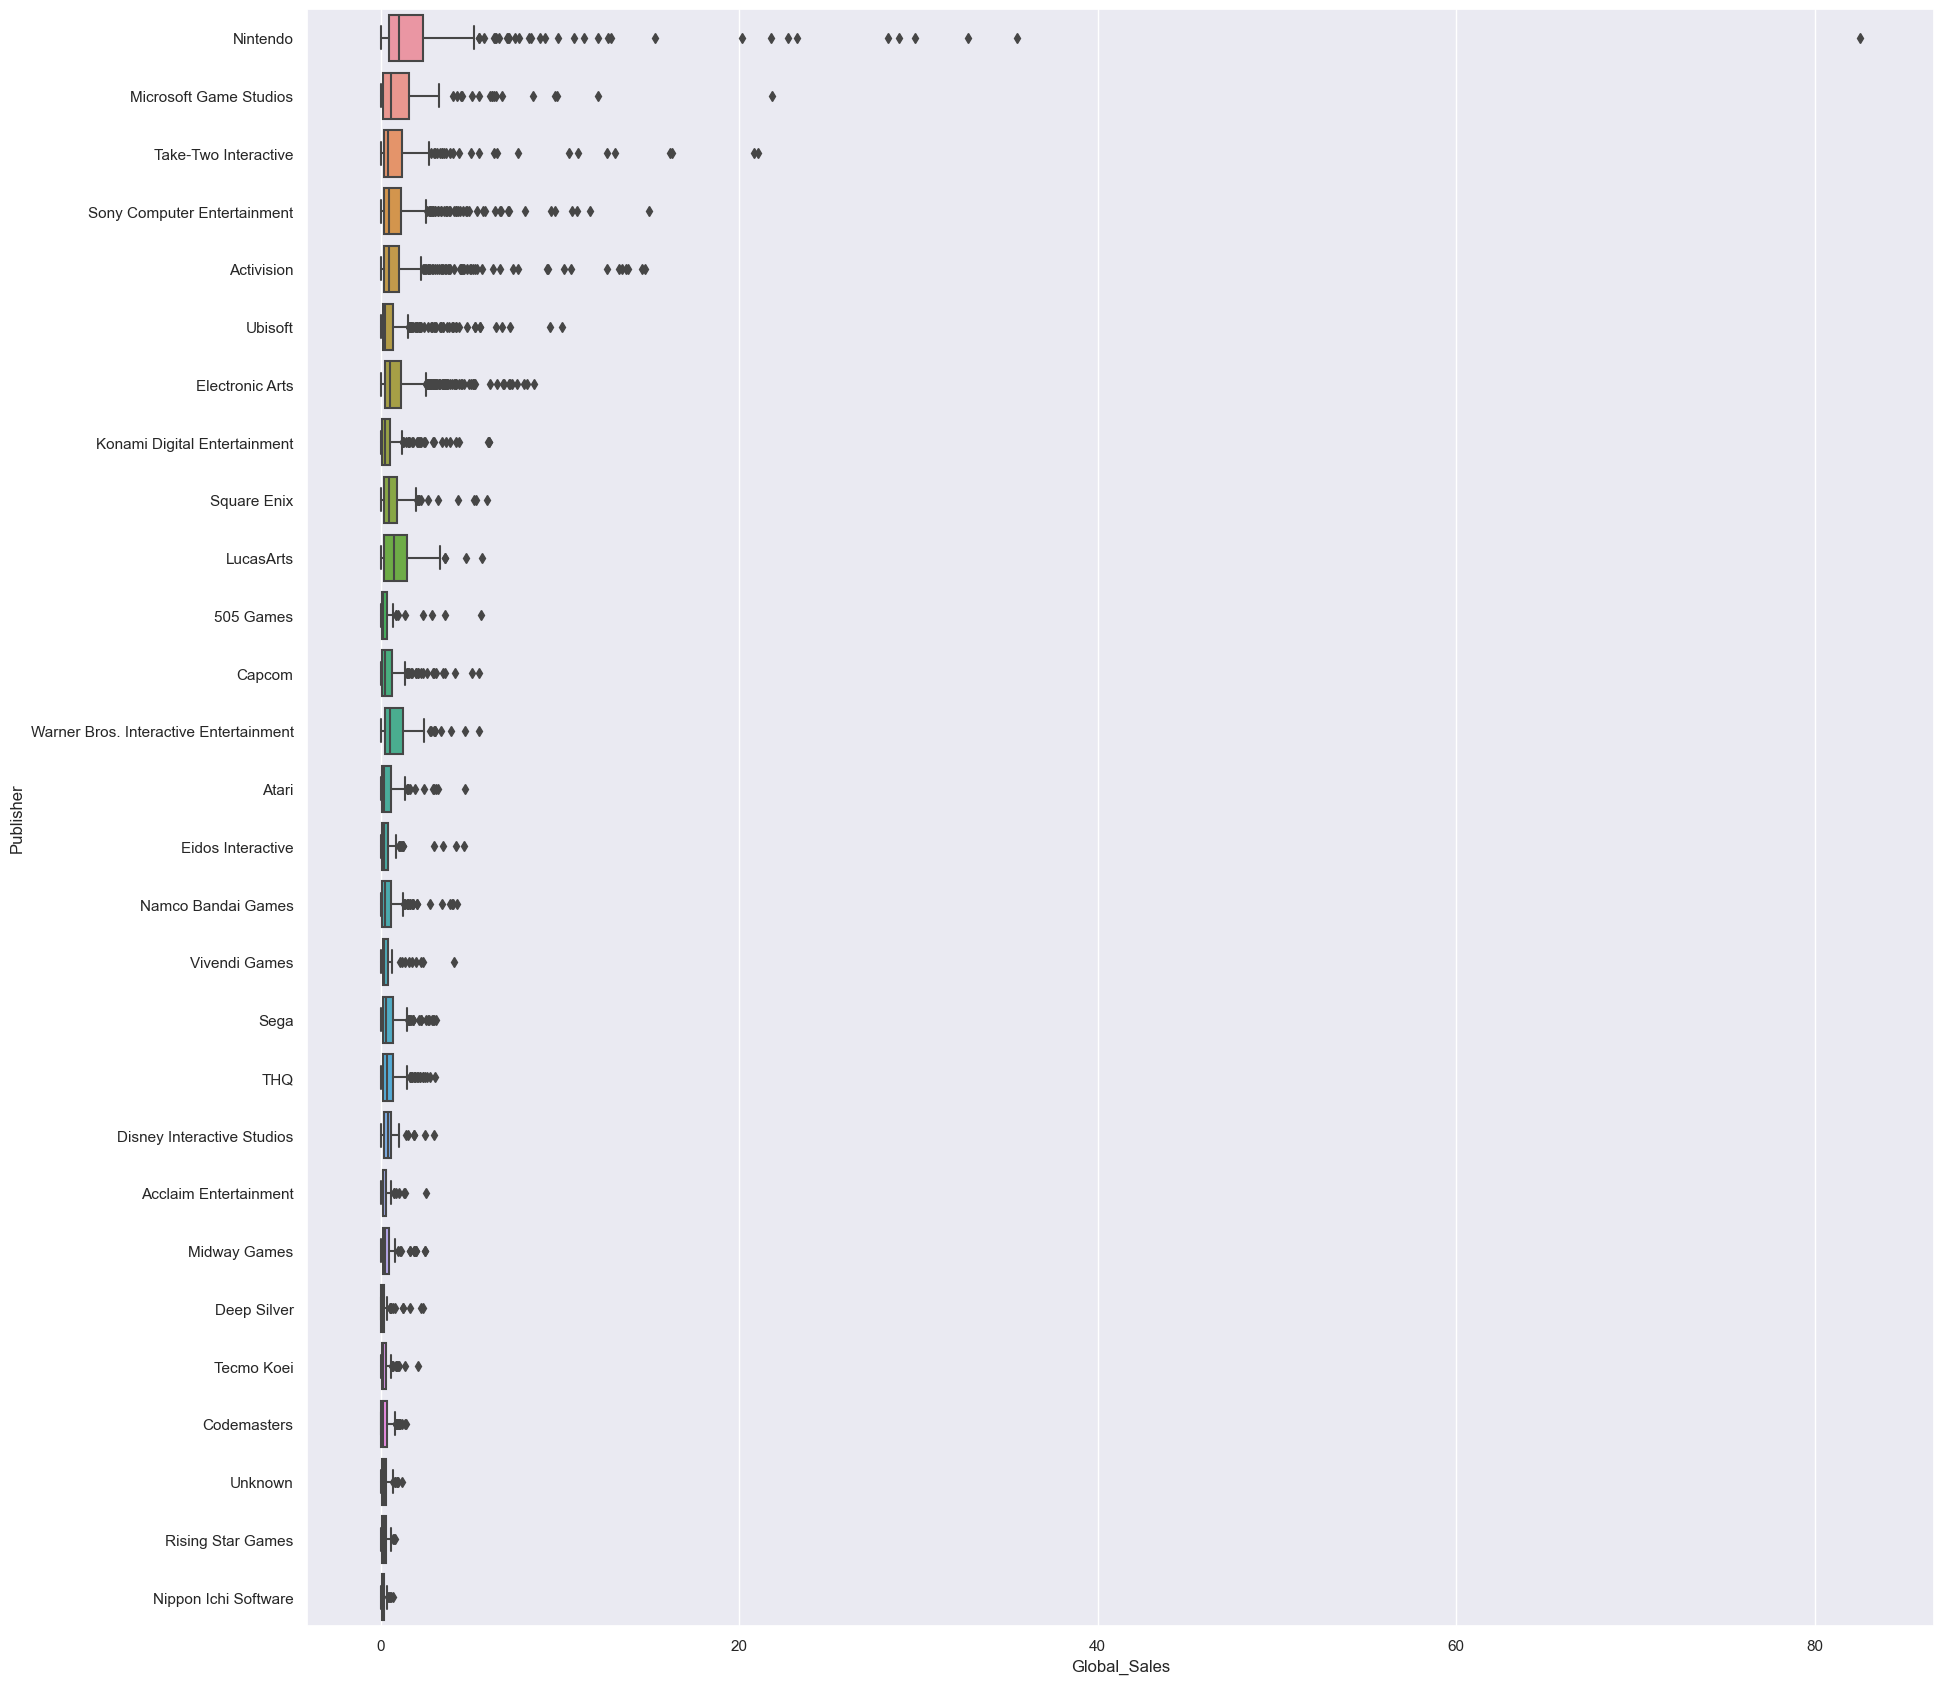

In [14]:
f=plt.figure(figsize=(21,21))
sb.boxplot(x='Global_Sales', y = 'Publisher', orient='h', data = videoGamesPublisher)

In [15]:
def right(s):
    Q1=s.quantile(0.25)
    Q3=s.quantile(0.75)
    IQR=Q3-Q1
    return Q3+IQR
    
def left(s):
    Q1=s.quantile(0.25)
    Q3=s.quantile(0.75)
    IQR=Q3-Q1
    return Q1-IQR

### For companies with over 50 sales

In [16]:
def removeOutliers(df,predictor,response):
    videoGamesPublisherGrouped=df.groupby(predictor)#['Global_Sales']
    whiskers=videoGamesPublisherGrouped[response].apply(lambda x: [left(x),right(x)]).apply(pd.Series)
    whiskers.columns=['left','right']
    merge=pd.merge(df,whiskers,on=predictor)
    videoGamesPublisherGrouped=merge[(merge[response]<=(merge['right'])) &
                                     (merge[response]>=(merge['left']))]
    f=plt.figure(figsize=(21,21))
    sb.boxplot(x=response, y = predictor, orient='h', data = videoGamesPublisherGrouped, 
          order= videoGamesPublisherGrouped.groupby(predictor)[response].median().sort_values(ascending=False).index)

## not complete but I think this can only be applied to numeric data i.e. critic score
def checkSkew(df,predictor):
  groupedDf=df.groupby(predictor)
  uniquePredictors=df[predictor].unique()
  for i in uniquePredictors:
    print(i, groupedDf[i].skew())

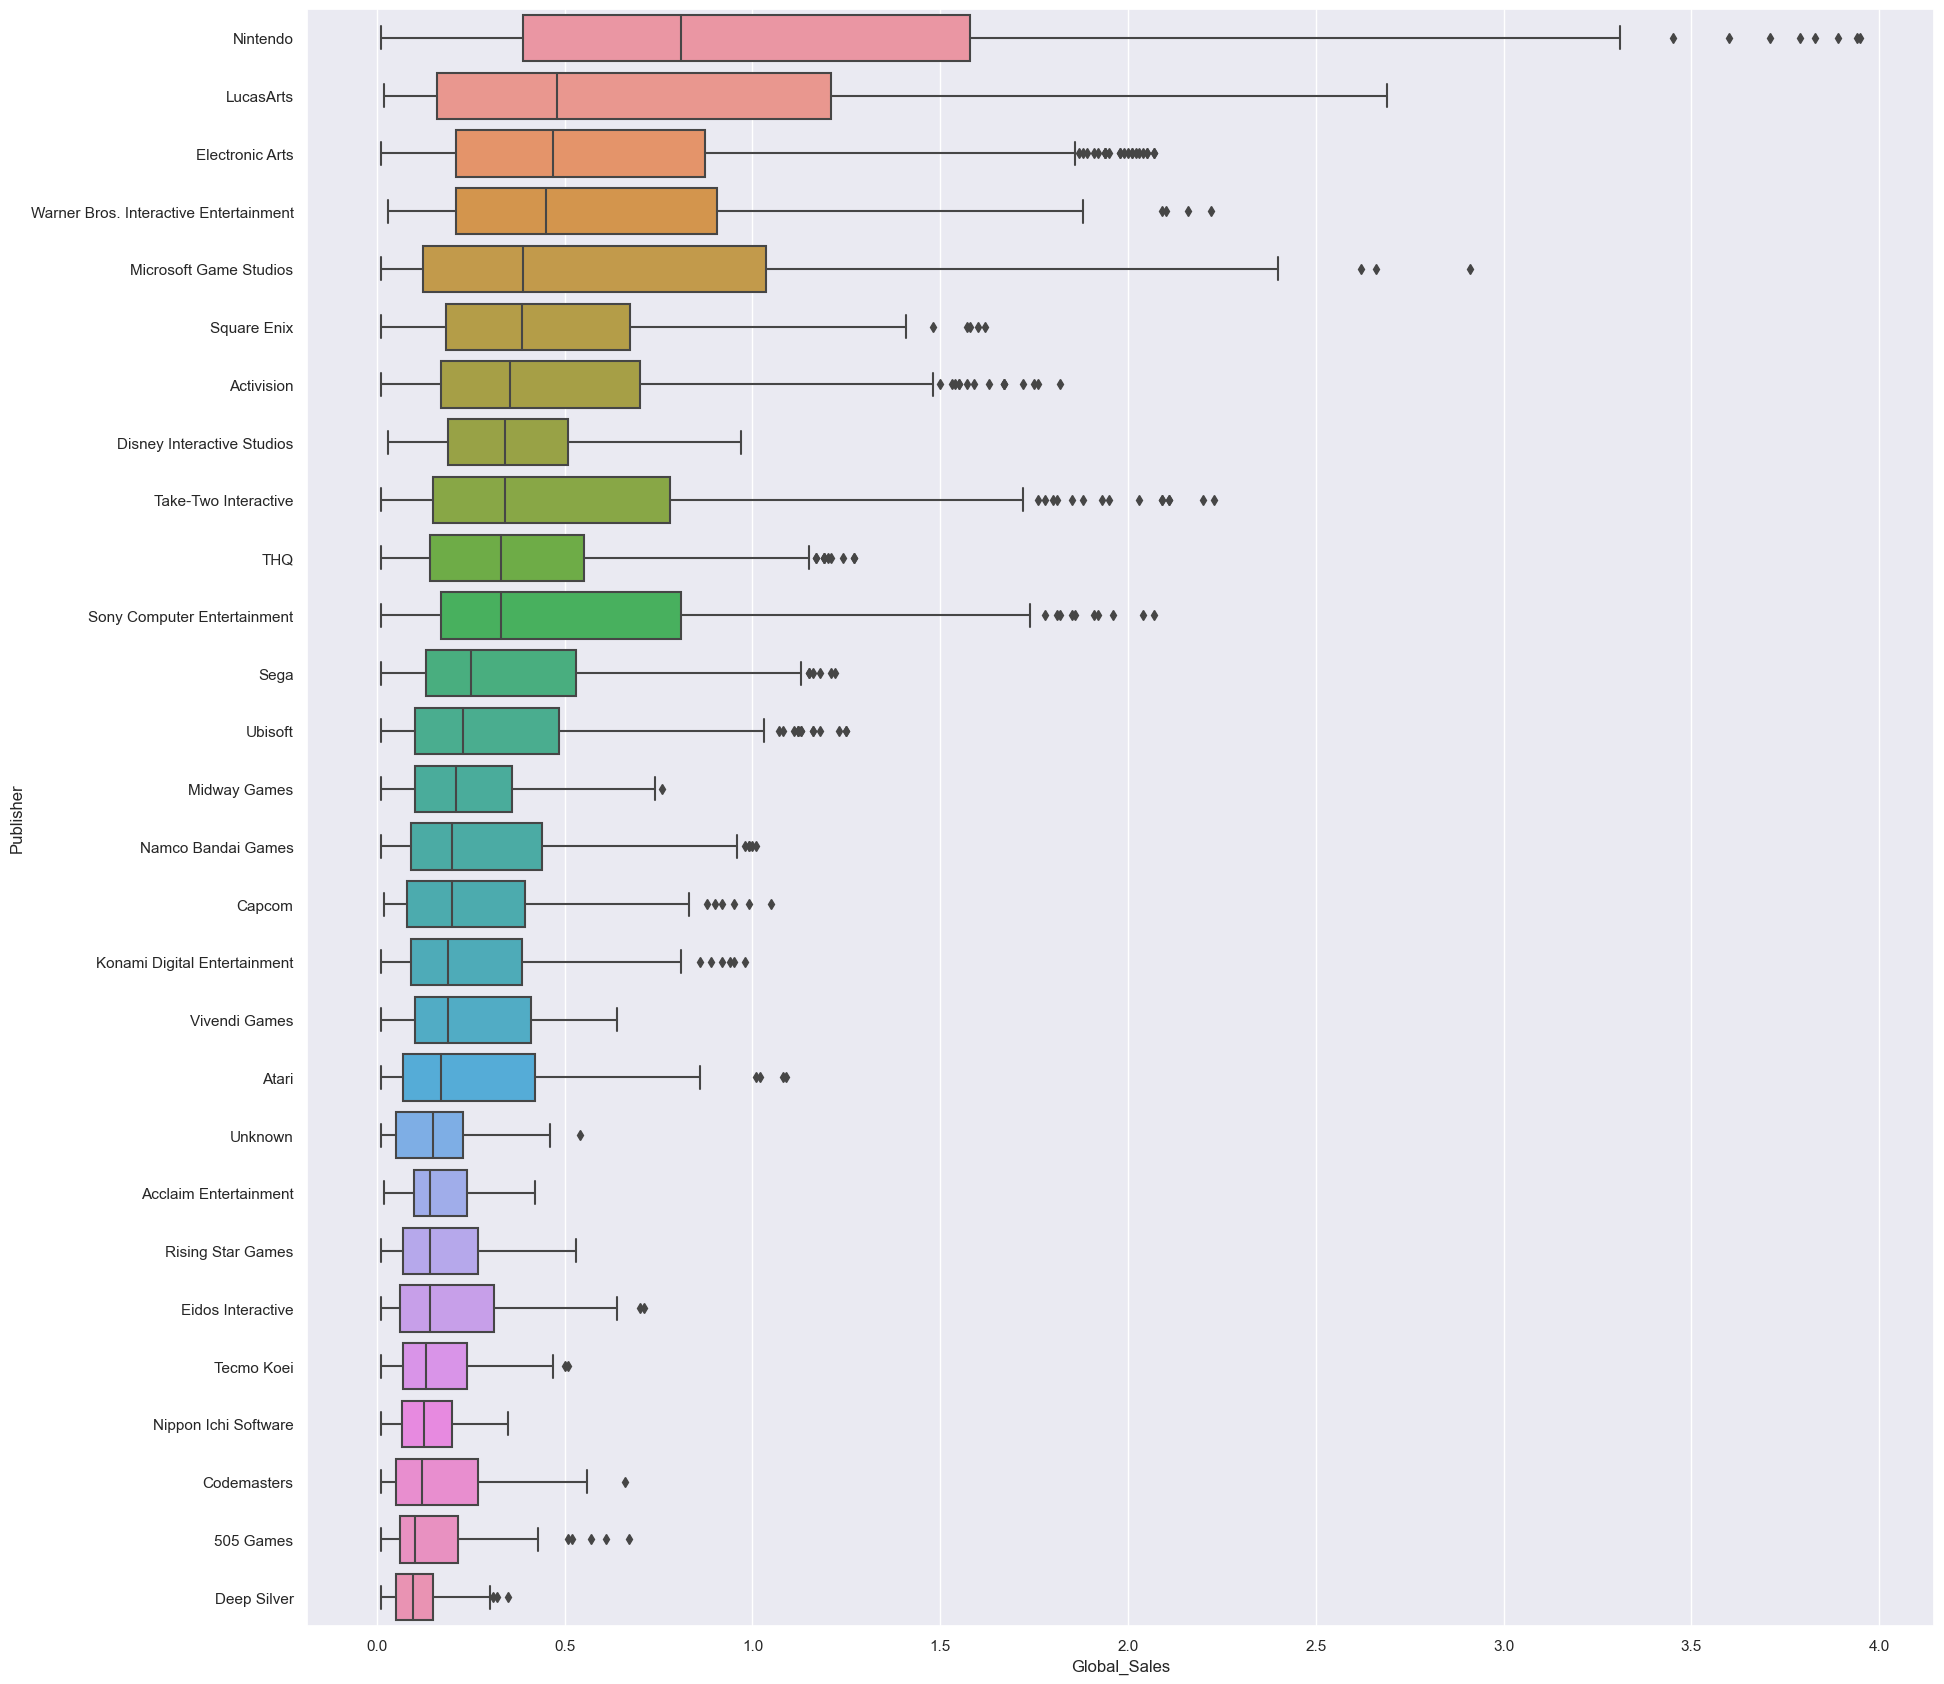

In [17]:
removeOutliers(videoGamesPublisher,'Publisher','Global_Sales')

### Visualisation for Genre

In [18]:
videoGamesSelectedCleaned['Genre'].nunique()

12

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

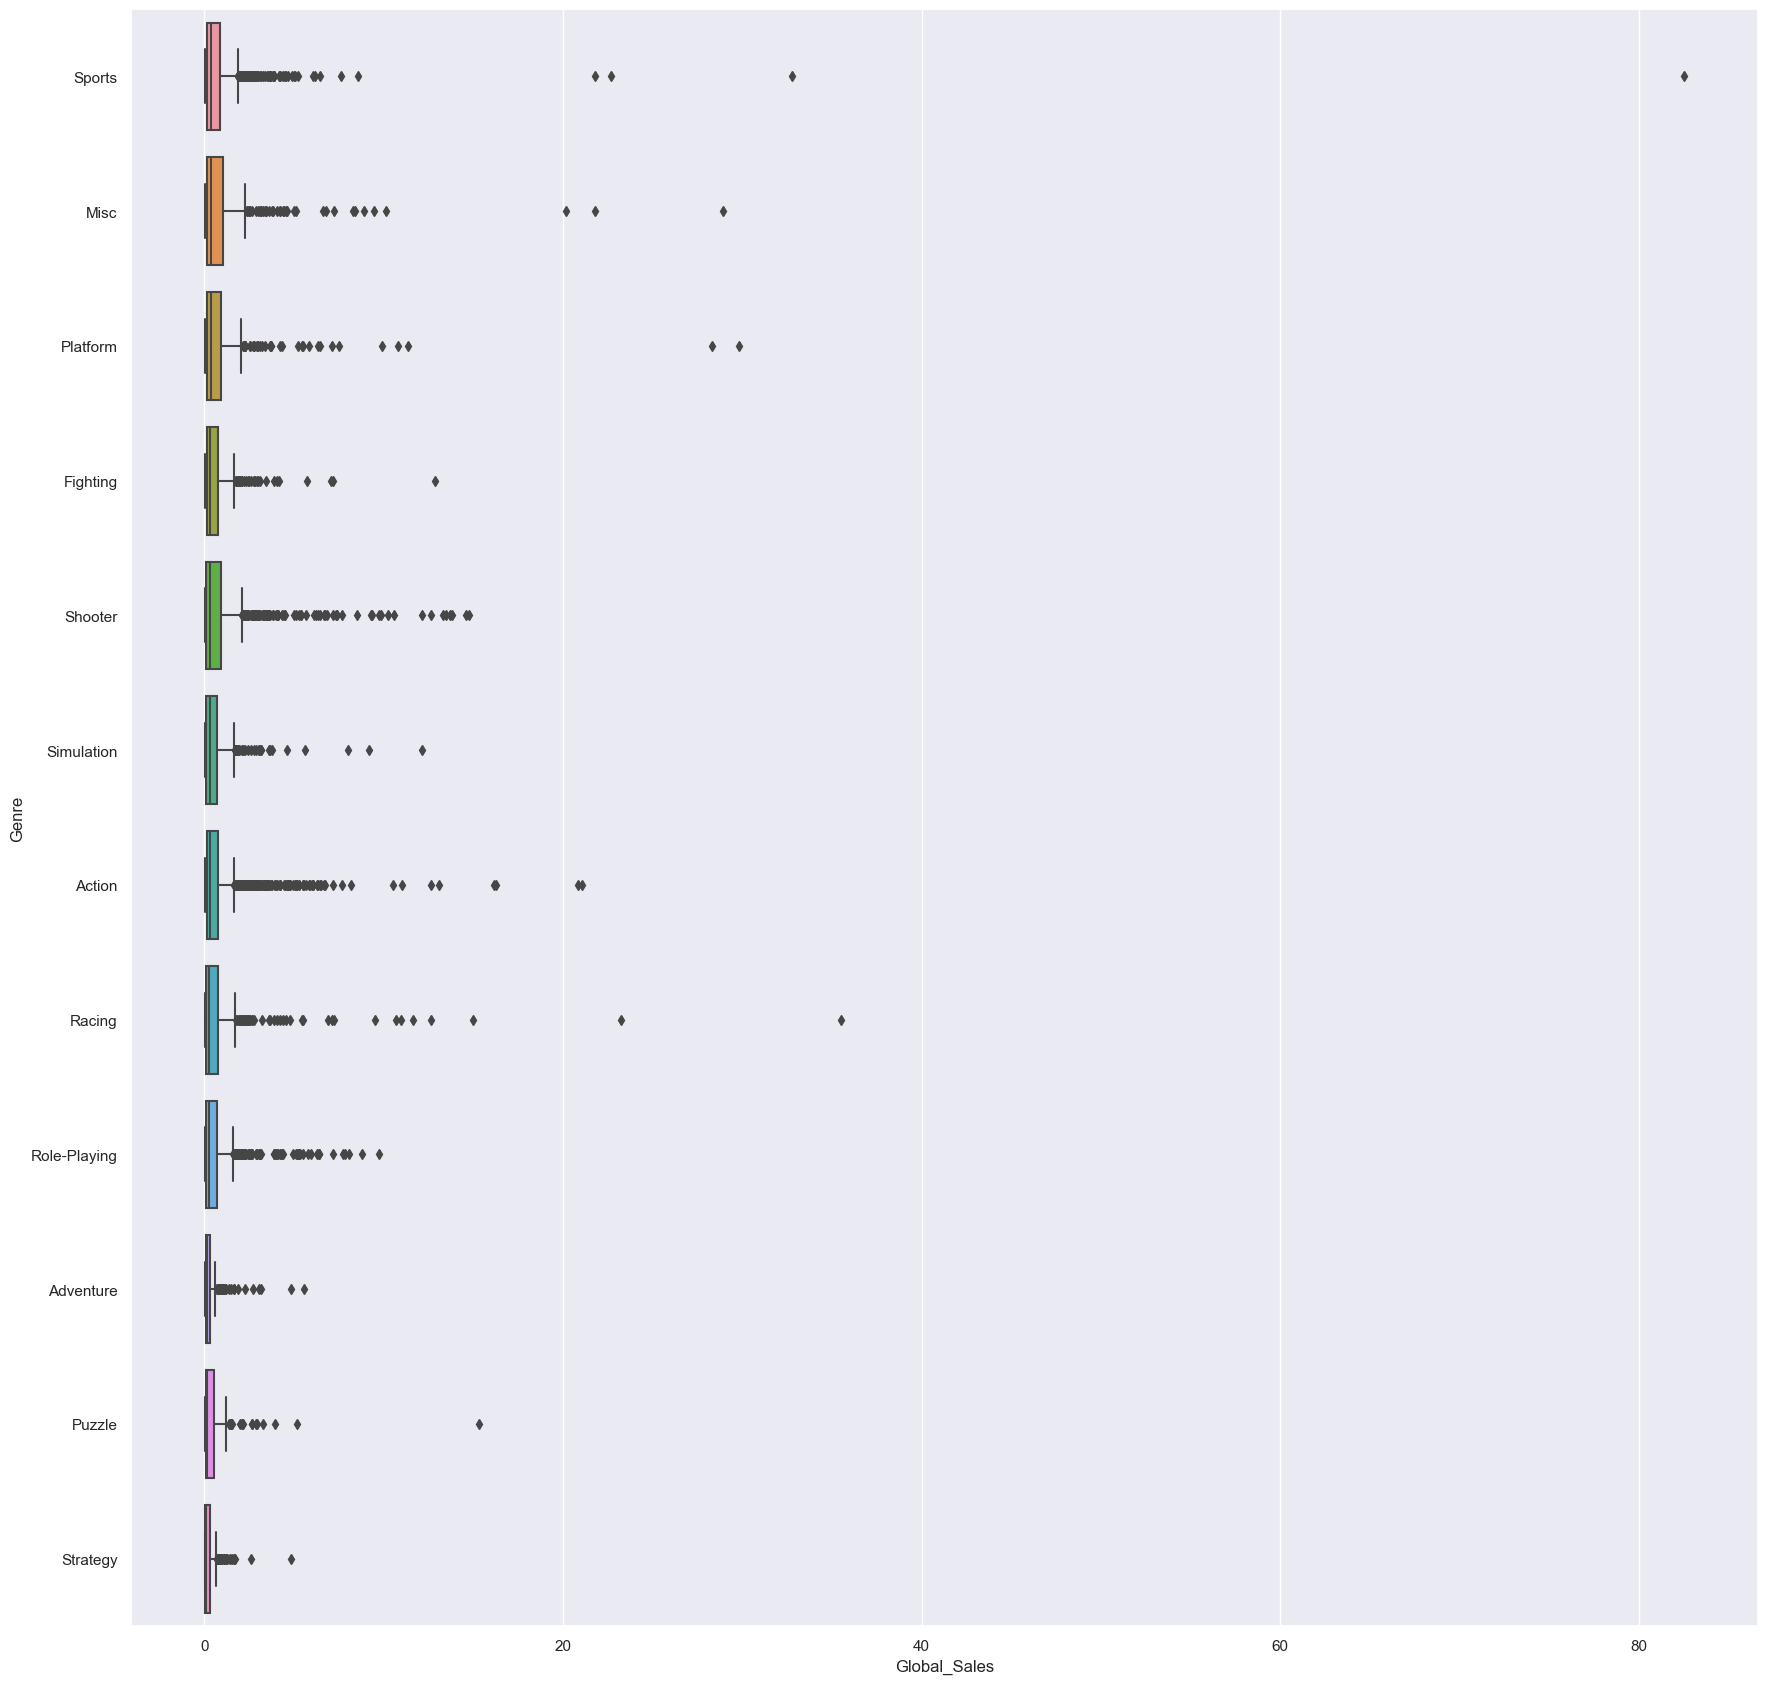

In [19]:
f=plt.figure(figsize=(21,21))
sb.boxplot(x='Global_Sales', y = 'Genre', orient='h', data = videoGamesSelectedCleaned, 
          order= videoGamesSelectedCleaned.groupby('Genre')['Global_Sales'].median().sort_values(ascending=False).index)


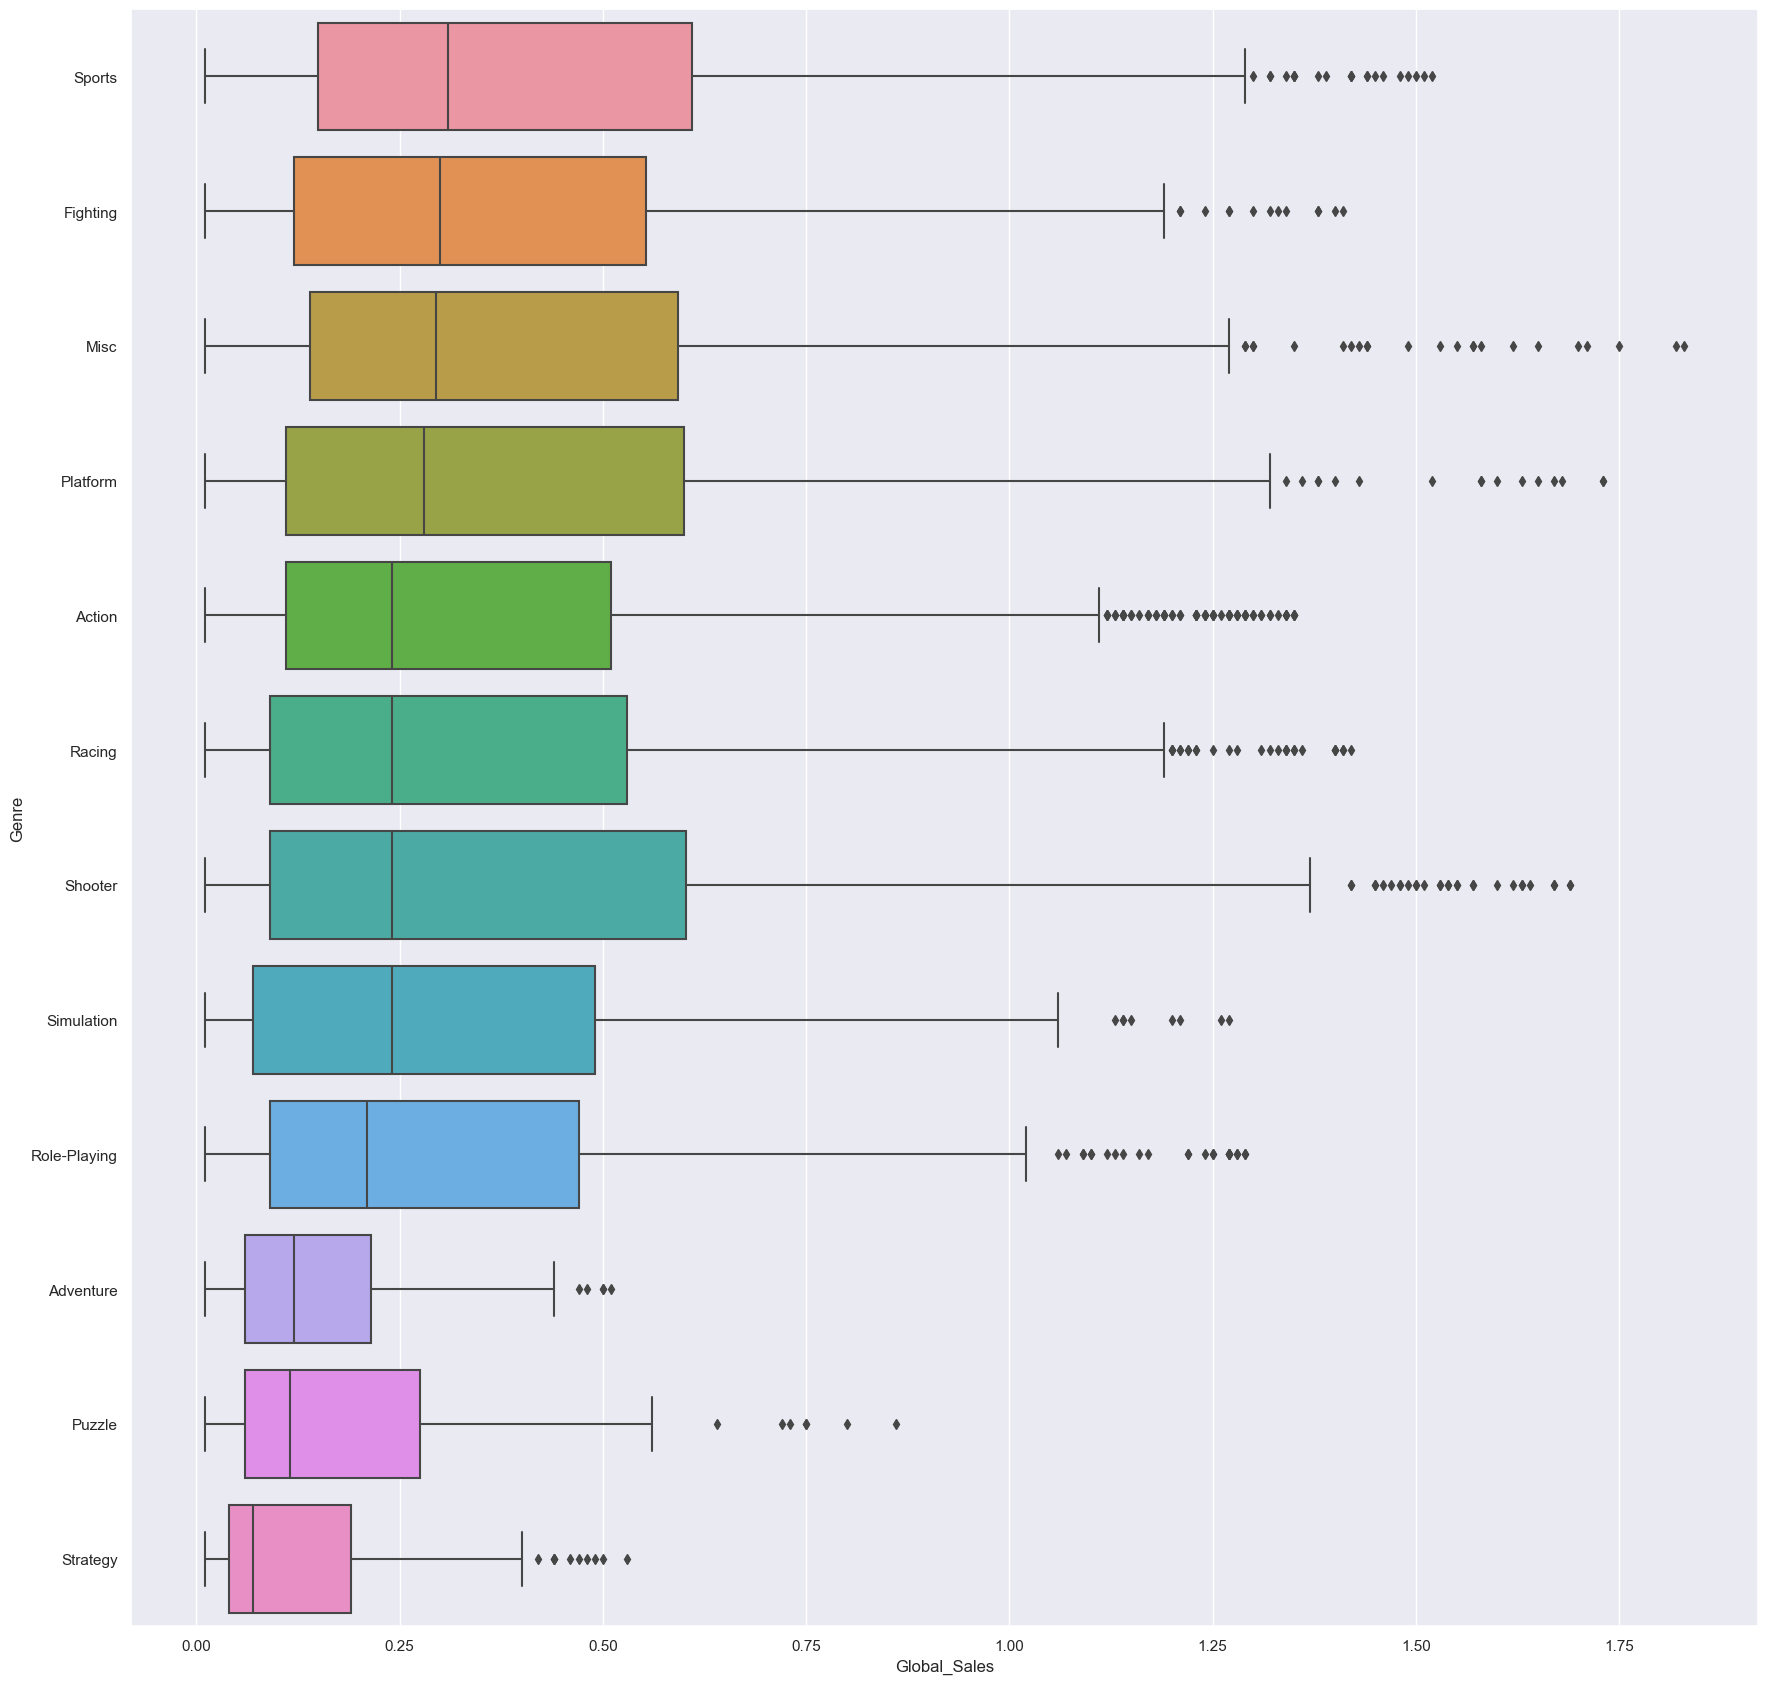

In [20]:
removeOutliers(videoGamesSelectedCleaned,'Genre','Global_Sales')

### For platform

In [21]:
videoGamesSelectedCleaned['Platform'].nunique()

17

<AxesSubplot:xlabel='Global_Sales', ylabel='Platform'>

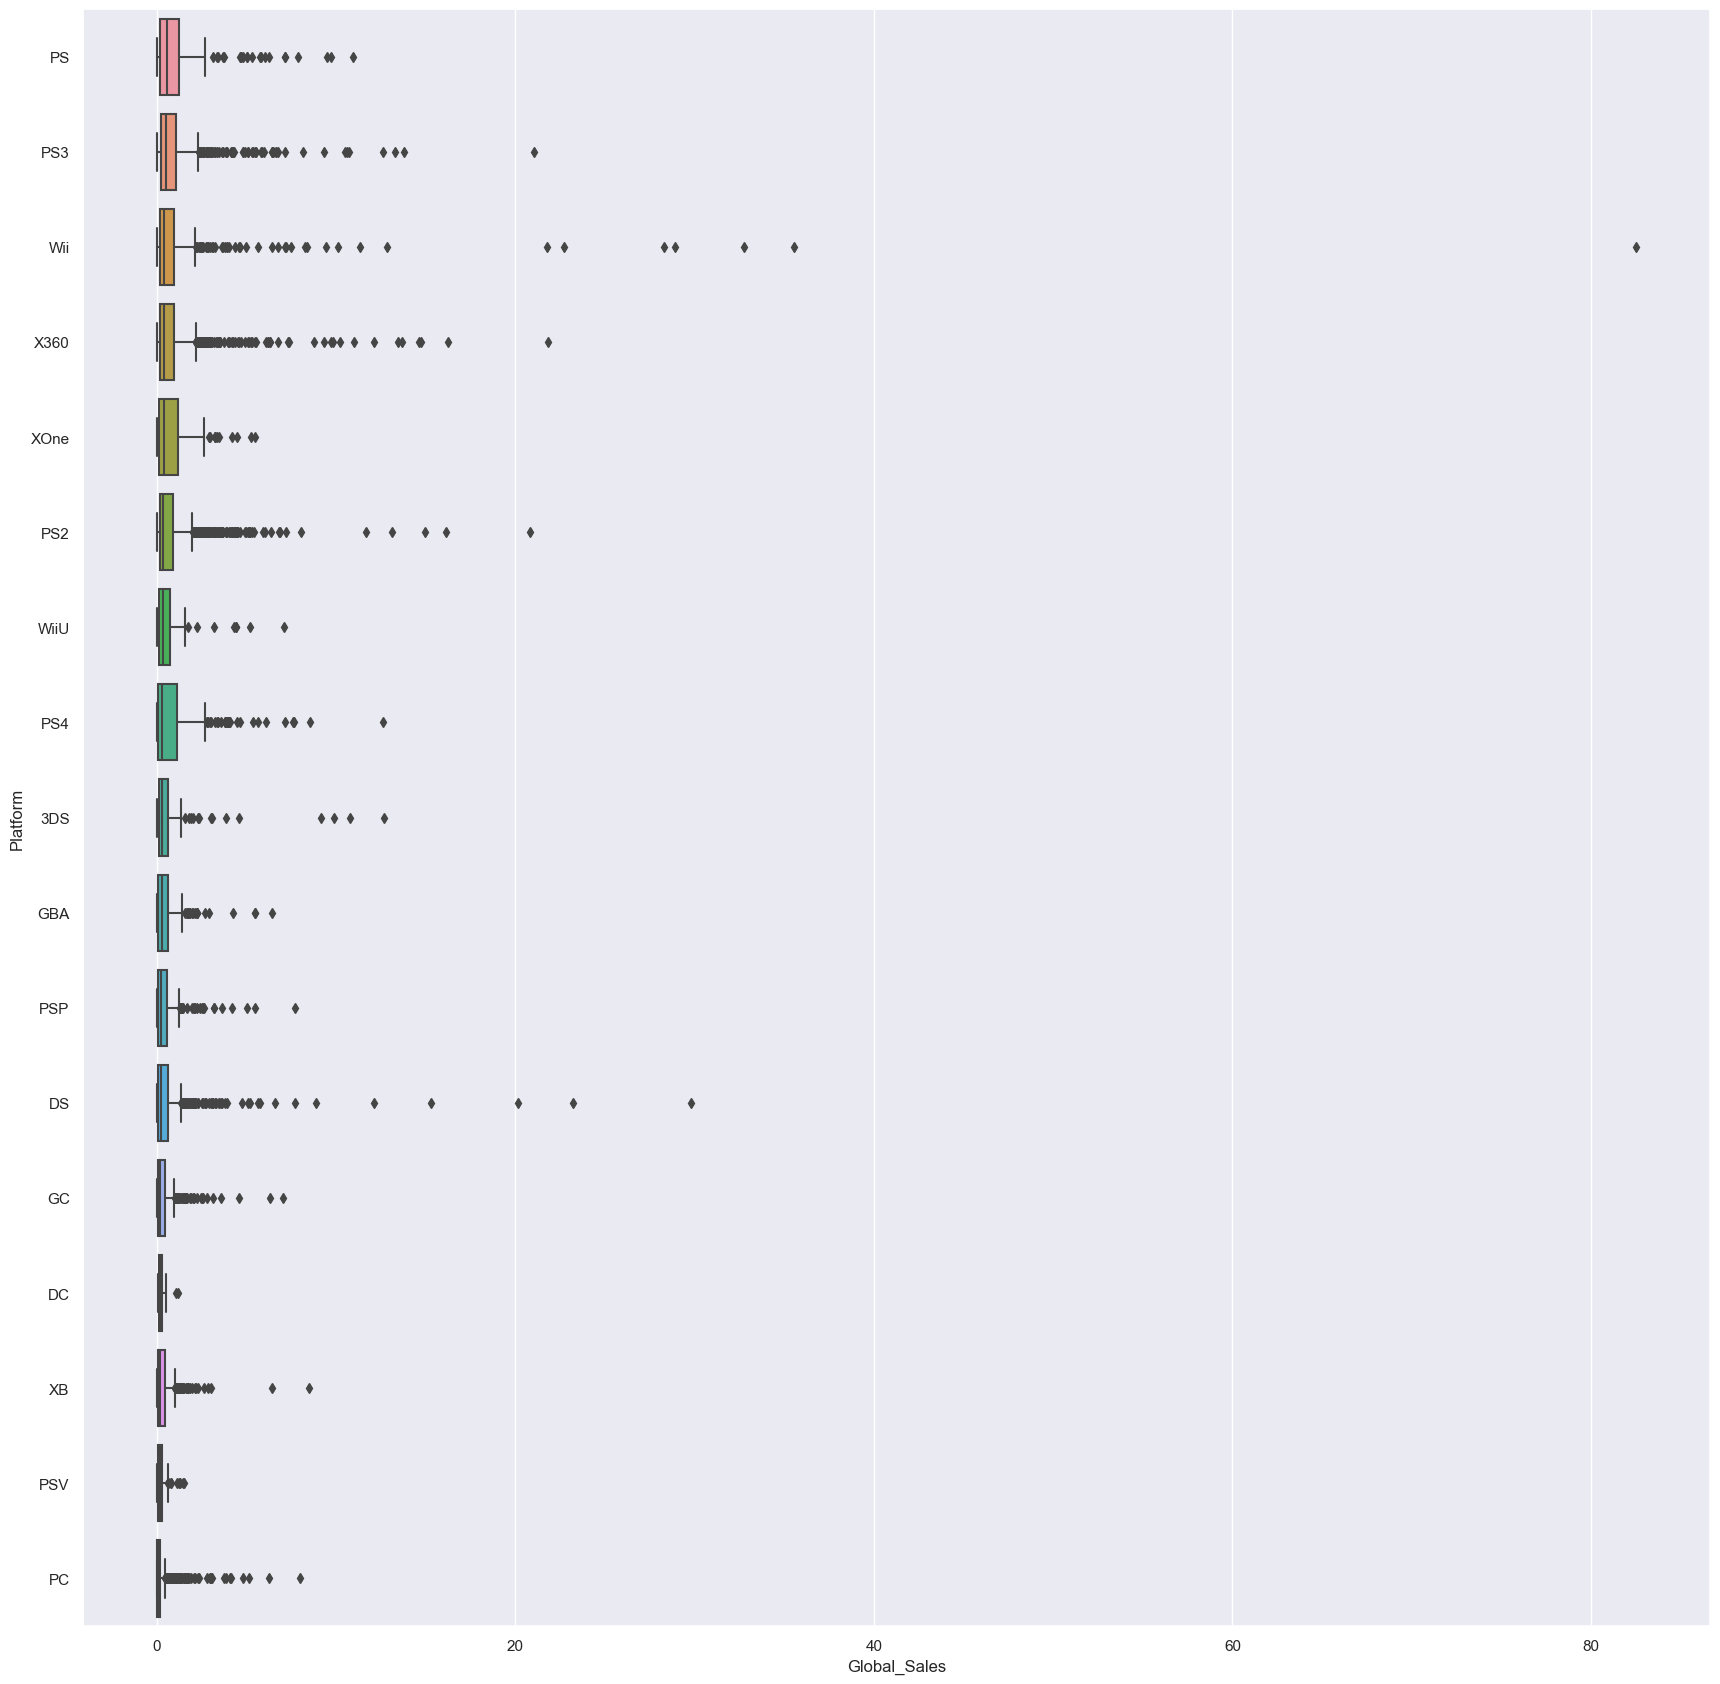

In [22]:
f=plt.figure(figsize=(21,21))
sb.boxplot(x='Global_Sales', y = 'Platform', orient='h', data = videoGamesSelectedCleaned, 
          order= videoGamesSelectedCleaned.groupby('Platform')['Global_Sales'].median().sort_values(ascending=False).index)


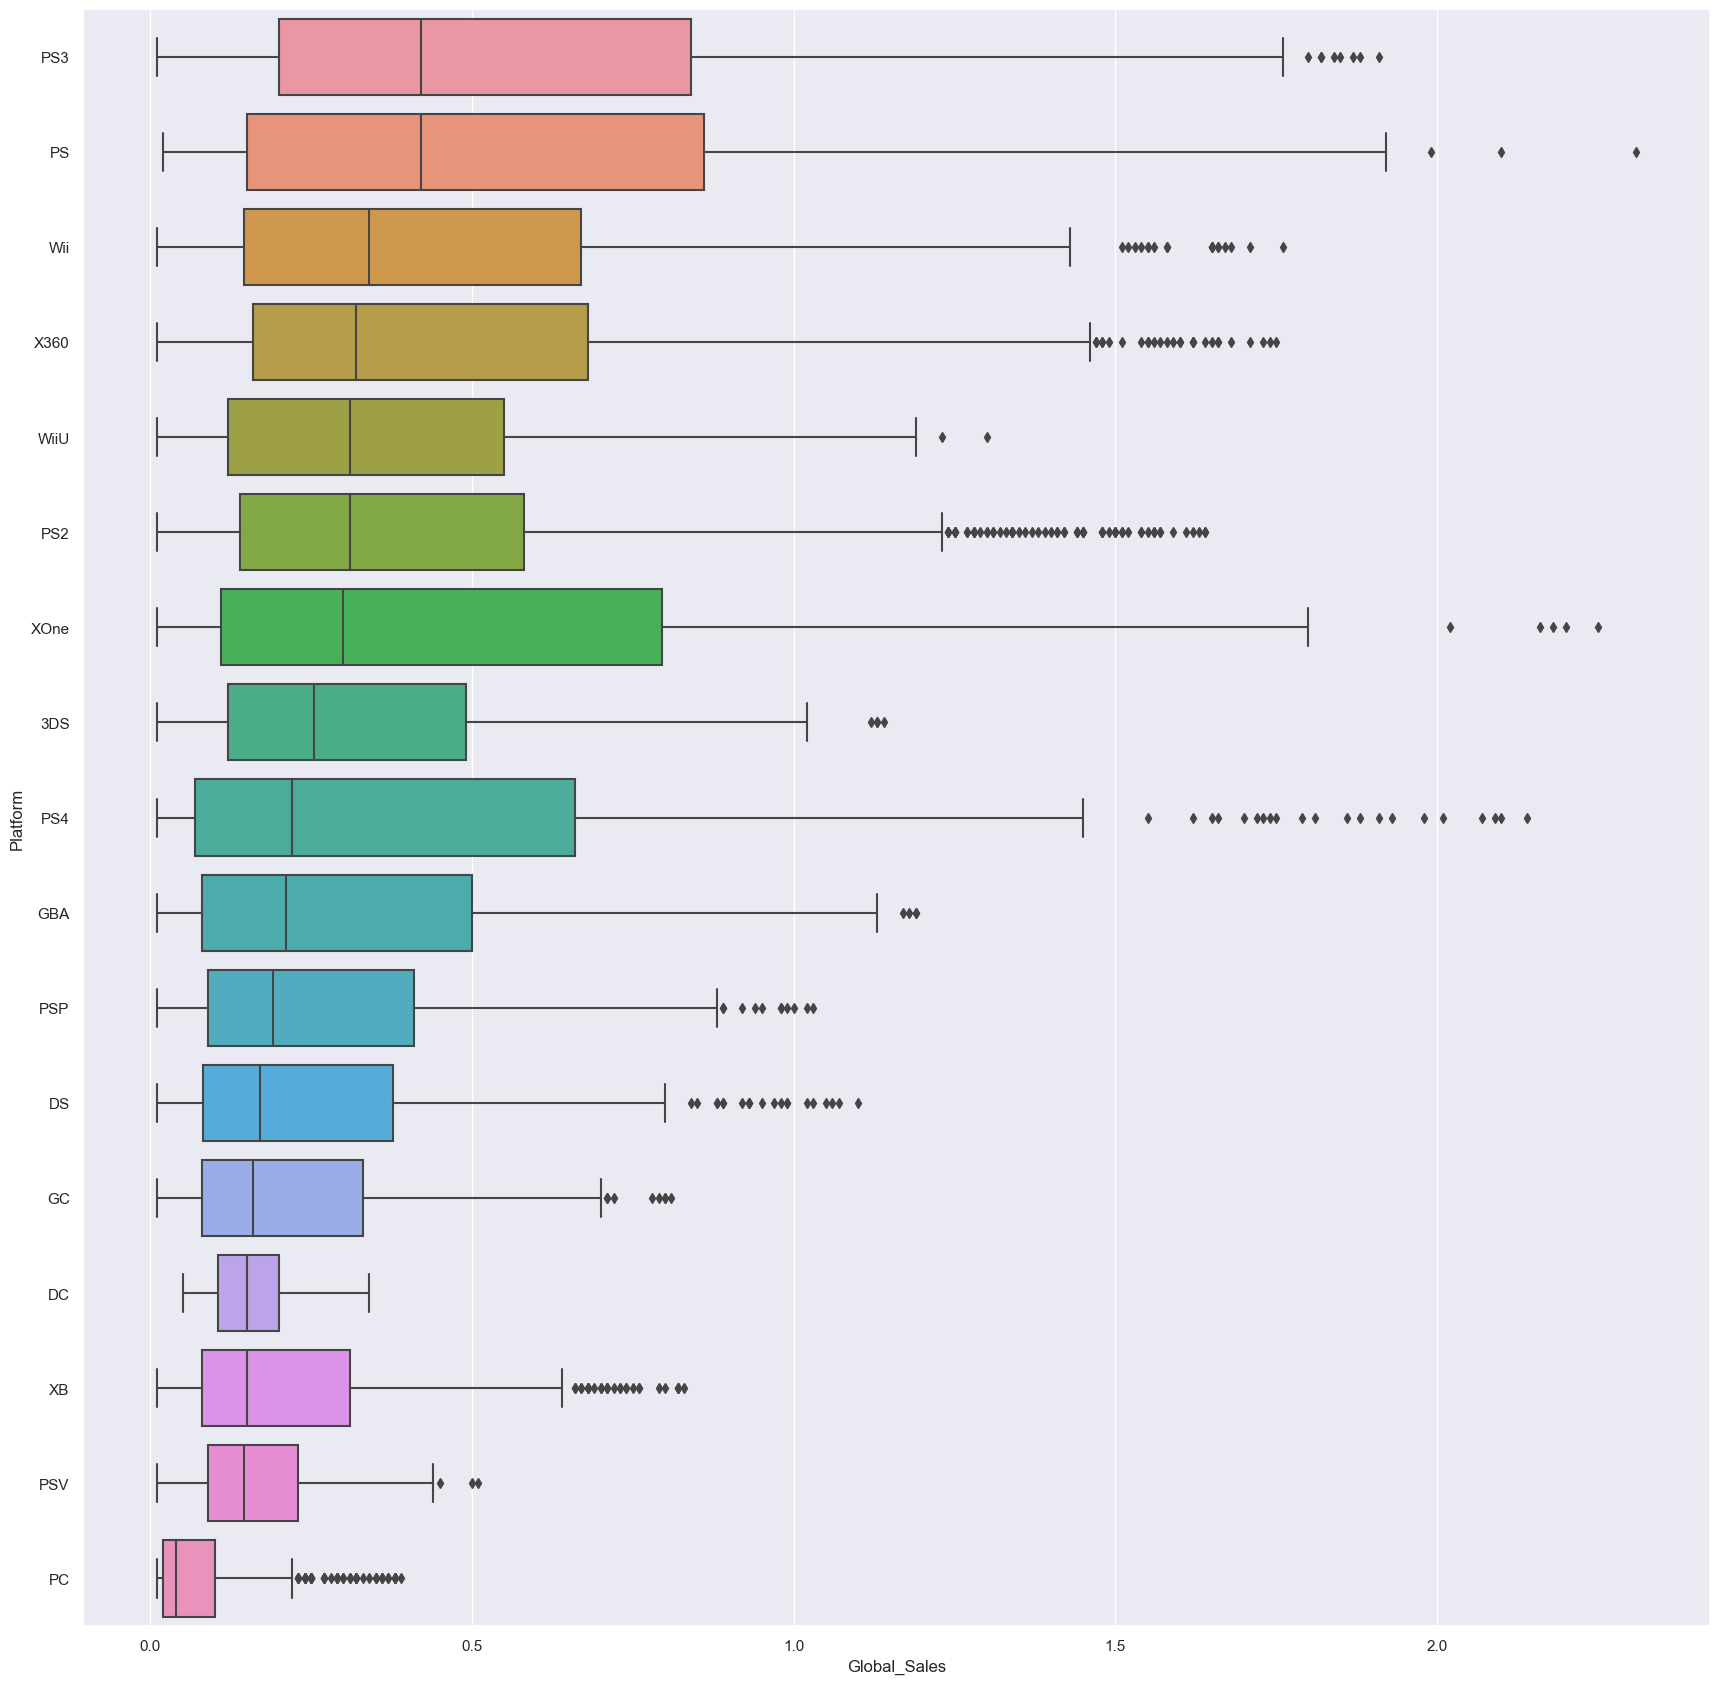

In [23]:
removeOutliers(videoGamesSelectedCleaned,'Platform','Global_Sales')

In [24]:
def removeOutliersIQR(df,column):
    df=df[(df[column]<=right(df[column])) & (df[column]>=left(df[column]))]
    return df

## 5. Machine Learning Models

In [25]:
newCleanedData = removeOutliersIQR(videoGamesSelectedCleaned,'Global_Sales')

### 1. Correlation

In [26]:
scoreSales=videoGamesSelectedCleaned[['Critic_Score','Global_Sales']]
newScoreSales = newCleanedData[['Critic_Score','Global_Sales']]

In [27]:
scoreSales.corr()

,Critic_Score,Global_Sales
Critic_Score,1.000000,0.237459
Global_Sales,0.237459,1.000000


In [28]:
newScoreSales.corr()

,Critic_Score,Global_Sales
Critic_Score,1.000000,0.274606
Global_Sales,0.274606,1.000000


<AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>

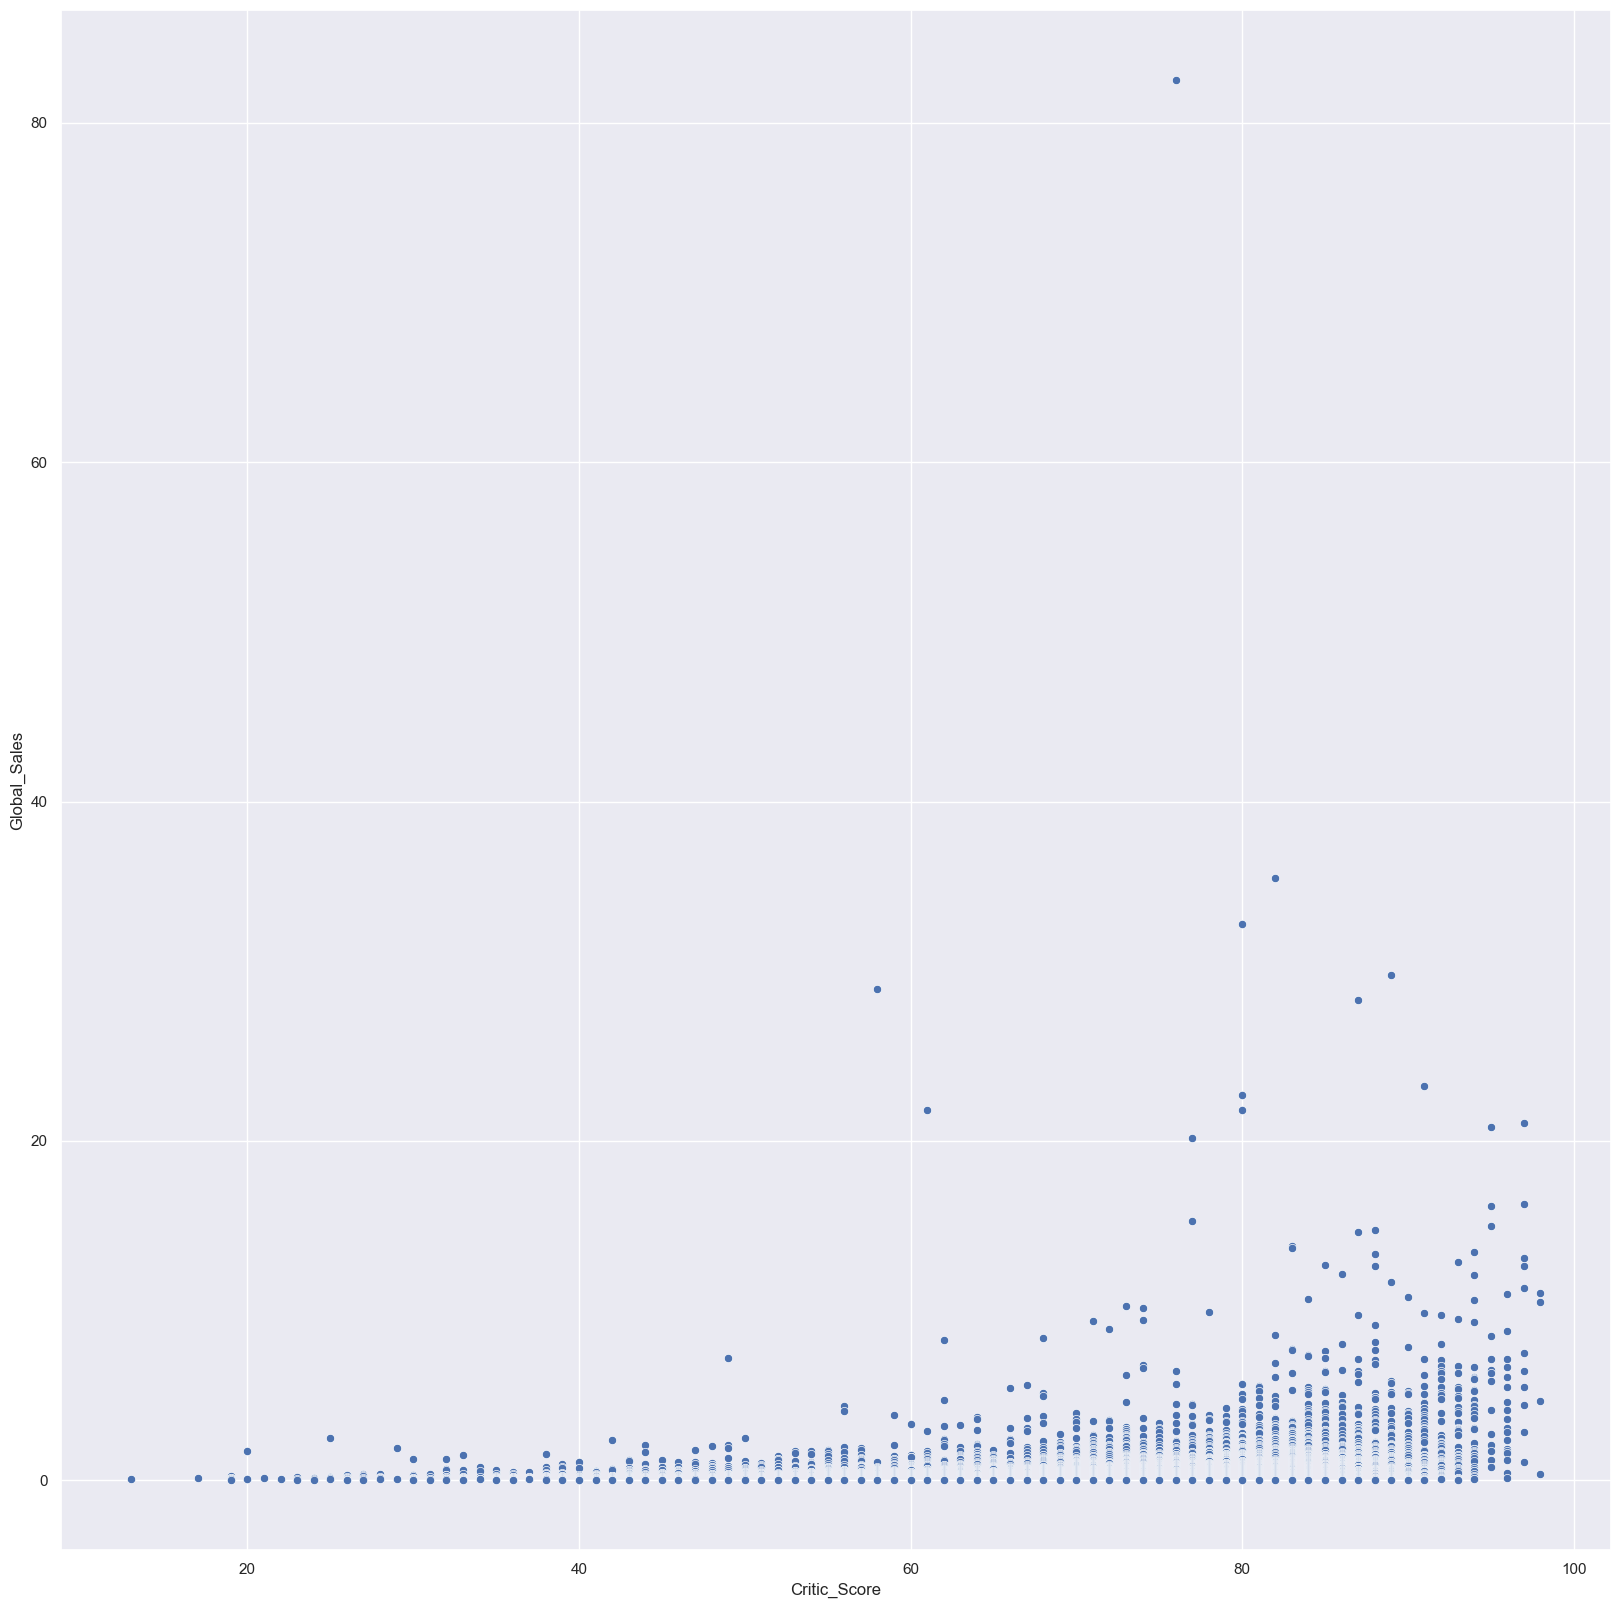

In [29]:
plt.figure(figsize=(20, 20))
sb.scatterplot(data=scoreSales, x = "Critic_Score", y = "Global_Sales")

<AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>

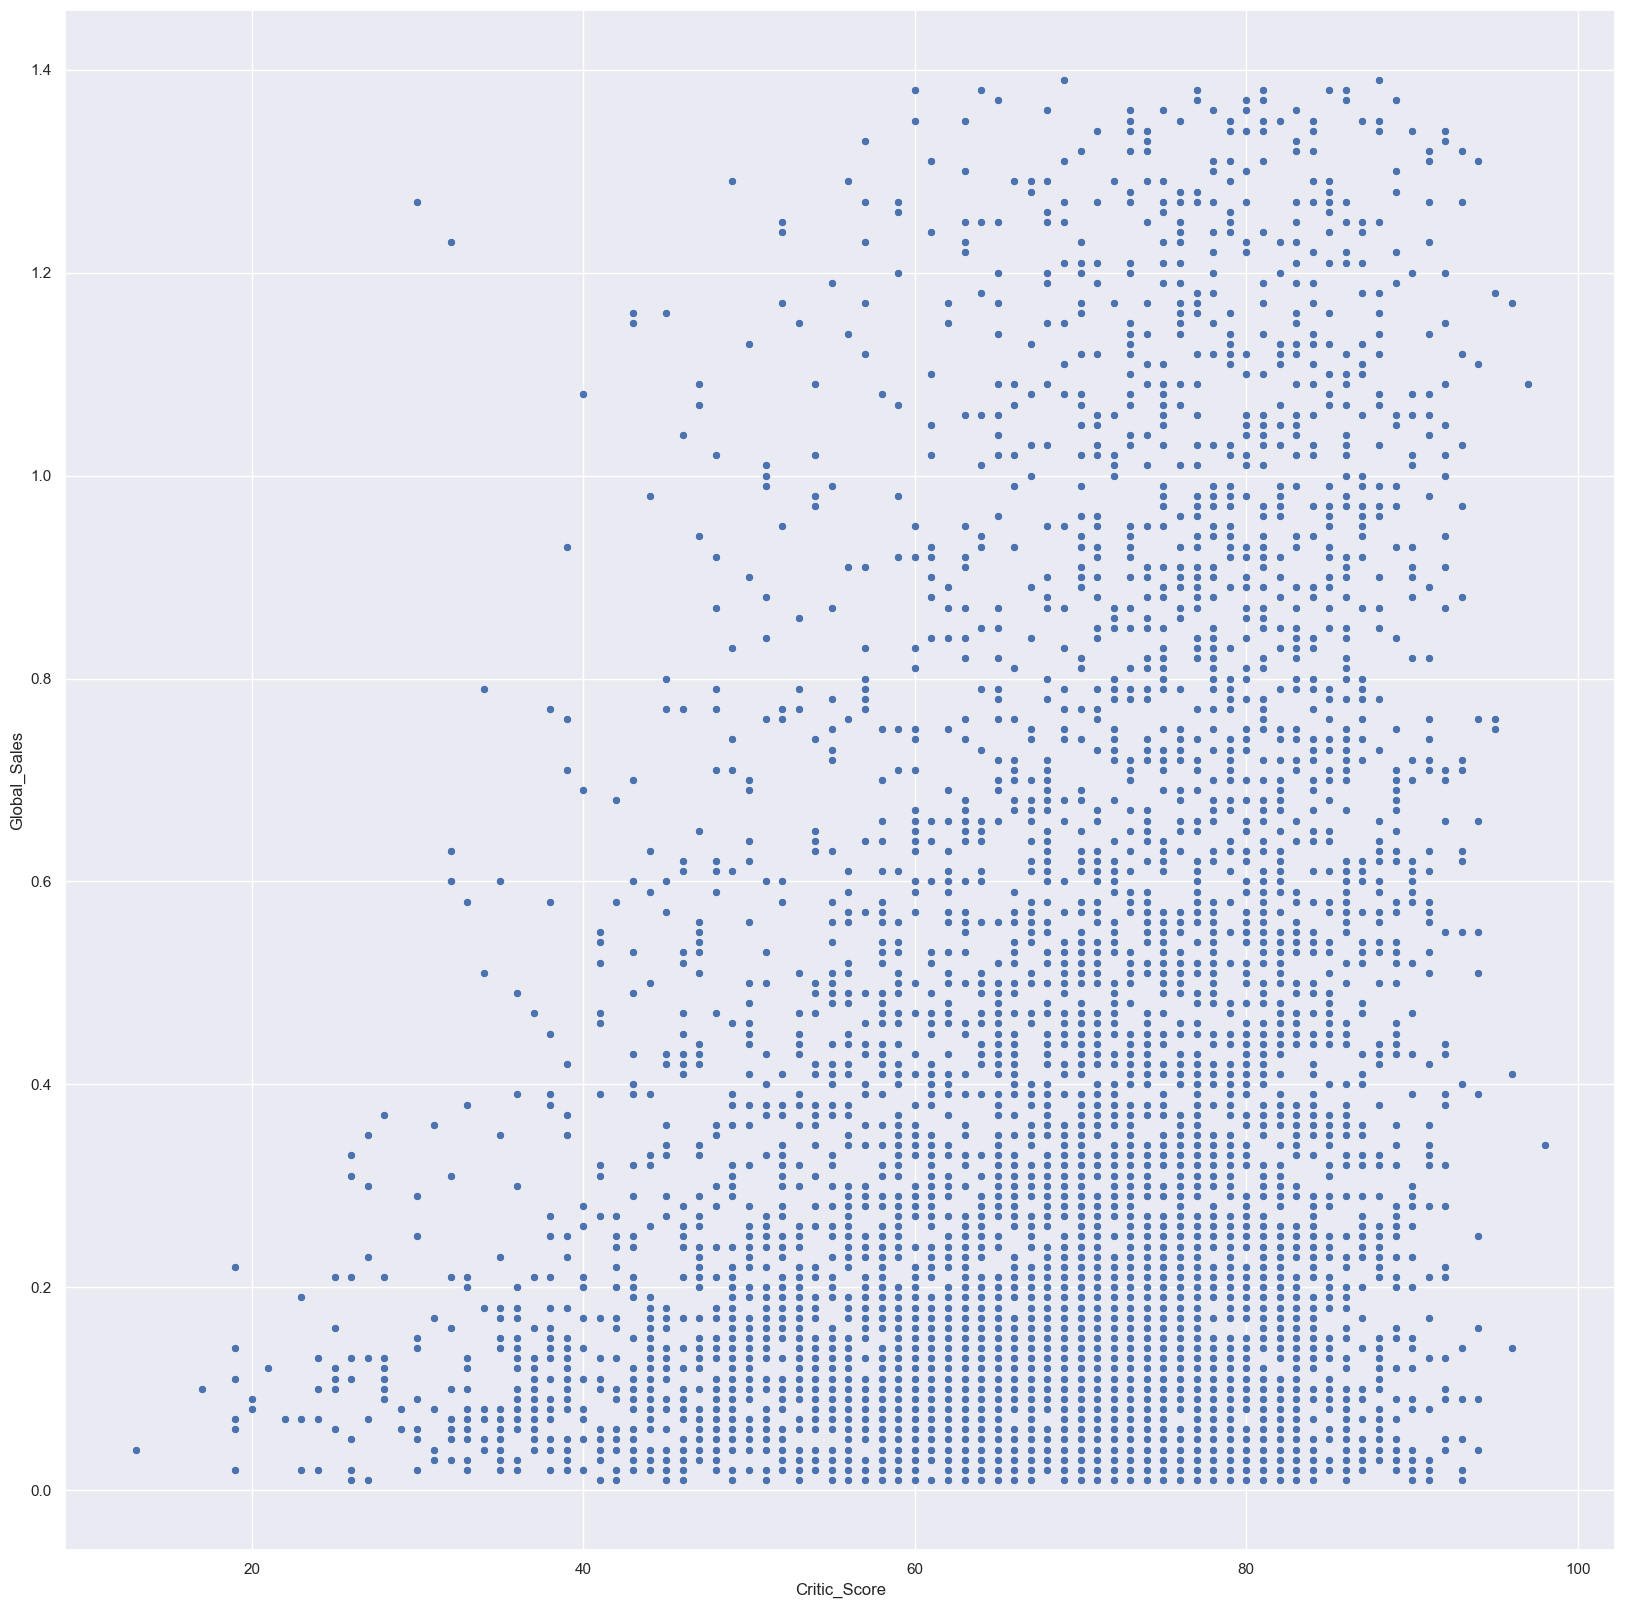

In [30]:
plt.figure(figsize=(20, 20))
sb.scatterplot(data=newScoreSales, x = "Critic_Score", y = "Global_Sales")

<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

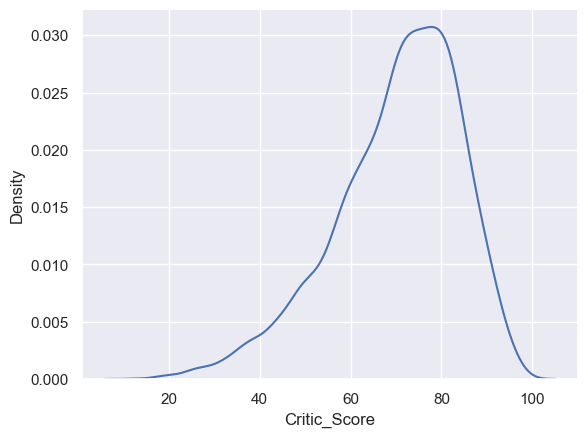

In [31]:
sb.kdeplot(data=scoreSales['Critic_Score'])

<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

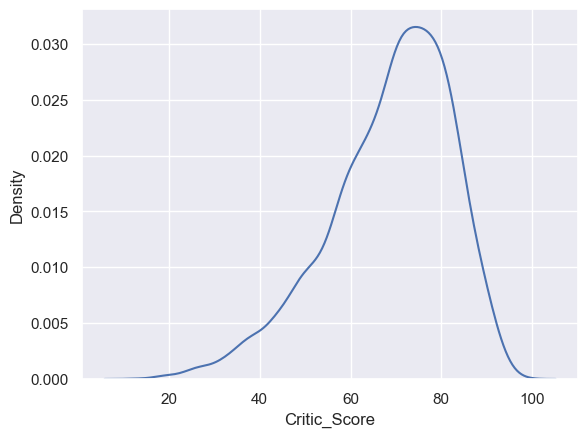

In [32]:
sb.kdeplot(data=newScoreSales['Critic_Score'])

got .25 corr not great but become better after remove outliers


## userscore corr

In [33]:
scoreSales=videoGamesSelectedCleaned[['User_Score','Global_Sales']]
scoreSales.corr()


,User_Score,Global_Sales
User_Score,1.000000,0.088561
Global_Sales,0.088561,1.000000


In [34]:
newScoreSales = newCleanedData[['User_Score','Global_Sales']]
newScoreSales.corr()

,User_Score,Global_Sales
User_Score,1.000000,0.130348
Global_Sales,0.130348,1.000000


become 0.13 without outliers


### 2. Linear Regression

In [35]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

# Create a Linear Regression object
linreg = LinearRegression()



train = newCleanedData.sample(frac=.8)
test = newCleanedData.drop(train.index)


cs_train = pd.DataFrame(train['Critic_Score'])
cs_test = pd.DataFrame(test['Critic_Score'])
gs_train = pd.DataFrame(train['Global_Sales'])
gs_test = pd.DataFrame(test['Global_Sales'])


Intercept of Regression 	: b =  [-0.0978826]
Coefficients of Regression 	: a =  [[0.00658879]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07190085583647698
Mean Squared Error (MSE) 	: 0.10263656578163133

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.08716428381728125
Mean Squared Error (MSE) 	: 0.10187825751517177



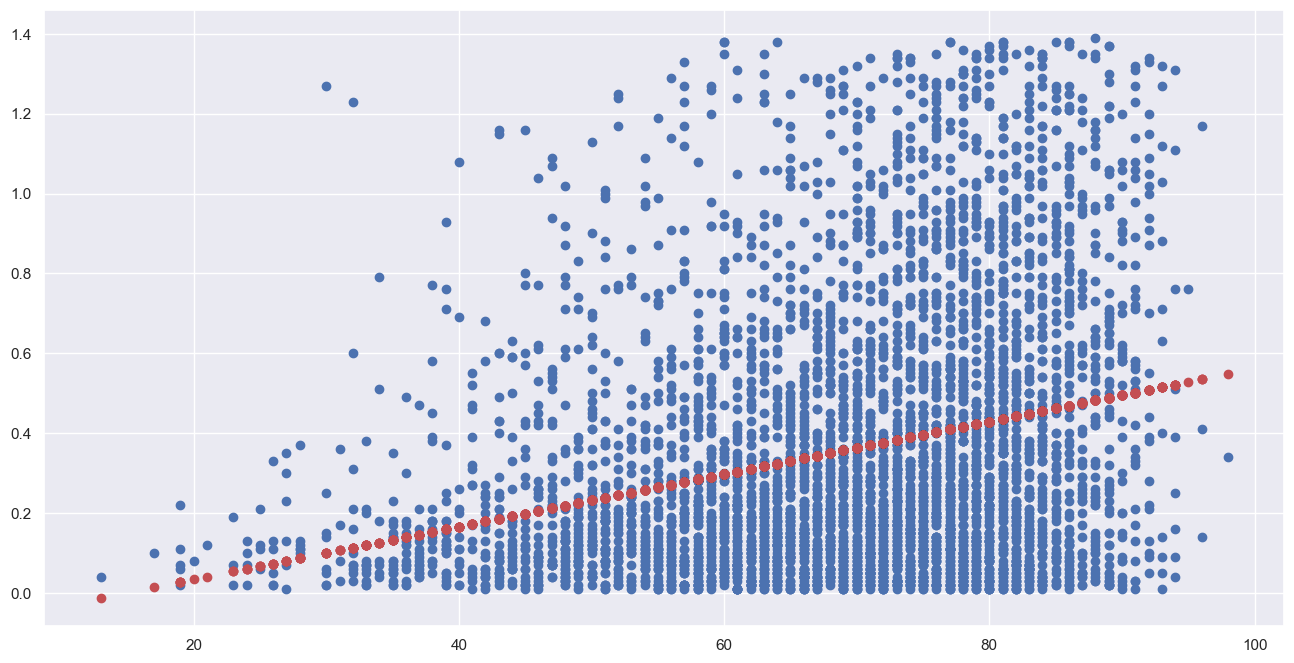

In [36]:

linreg.fit(cs_train, gs_train)
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
gs_train_pred = linreg.predict(cs_train)
gs_test_pred = linreg.predict(cs_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(cs_train, gs_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(gs_train, gs_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(cs_test, gs_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(gs_test, gs_test_pred))
print()


f = plt.figure(figsize=(16, 8))
plt.scatter(cs_train, gs_train)
plt.scatter(cs_train, gs_train_pred, color = "r")
plt.show()

### 3. Decision Tree

Predicting Rating by global sales

Train Classification Accuracy: 0.36903039073806077
Test Classification Accuracy: 0.38626964433416044


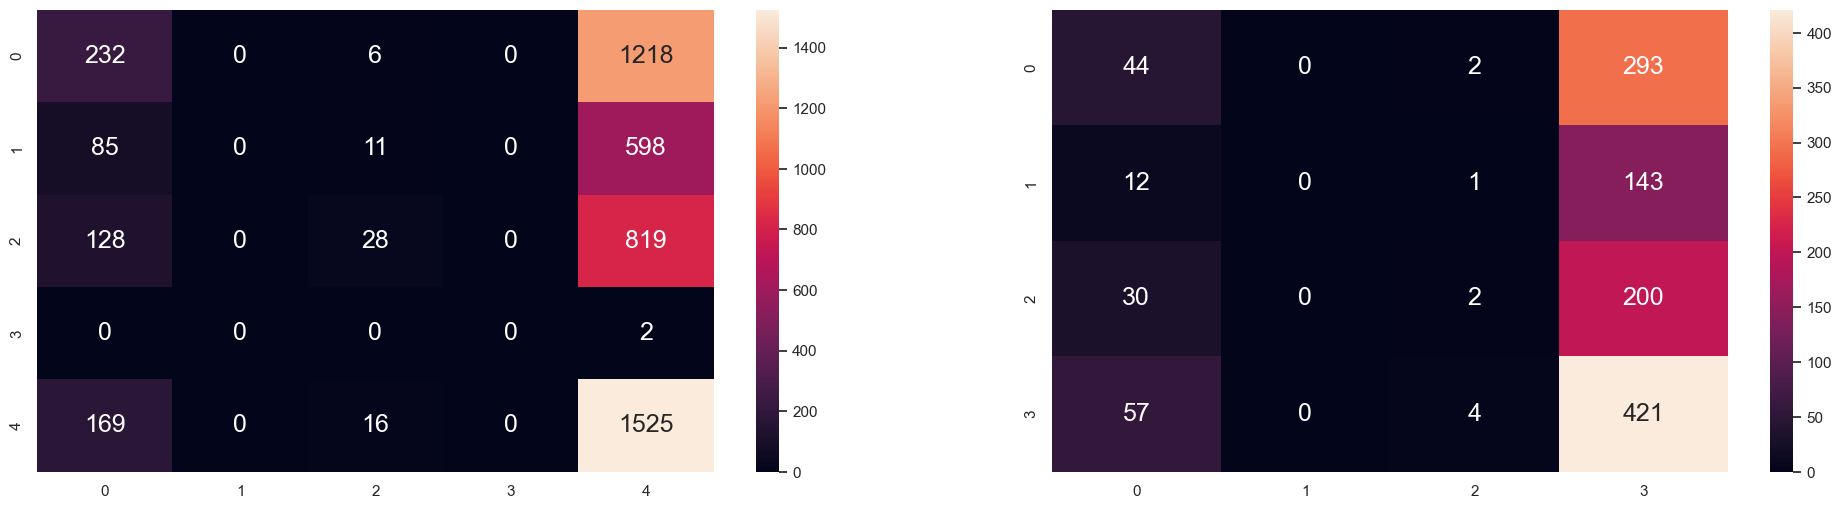

In [37]:
ra_train = pd.DataFrame(train['Rating'])
ra_test = pd.DataFrame(test['Rating'])
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object

dectree2 = DecisionTreeClassifier(max_depth = 8)

# Train the Decision Tree Classifier model

dectree2.fit(gs_train,ra_train)



from sklearn.tree import export_graphviz
dot_data2 = export_graphviz(dectree2, out_file=None, 
                                feature_names = gs_train.columns,
                                filled=True,
                               class_names=['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'])


import graphviz                          
graphviz.Source(dot_data2)

train_pred2 = dectree2.predict(gs_train)
test_pred2 = dectree2.predict(gs_test)

print("Train Classification Accuracy:",dectree2.score(gs_train,ra_train))
print("Test Classification Accuracy:",dectree2.score(gs_test,ra_test))
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(24, 6))
train_m = confusion_matrix(ra_train,train_pred2)
test_m = confusion_matrix(ra_test,test_pred2)
sb.heatmap(train_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sb.heatmap(test_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])
plt.show()




Predicting Rating by Genre and global_sales

Train Classification Accuracy: 0.5774240231548481
Test Classification Accuracy: 0.5401157981803143


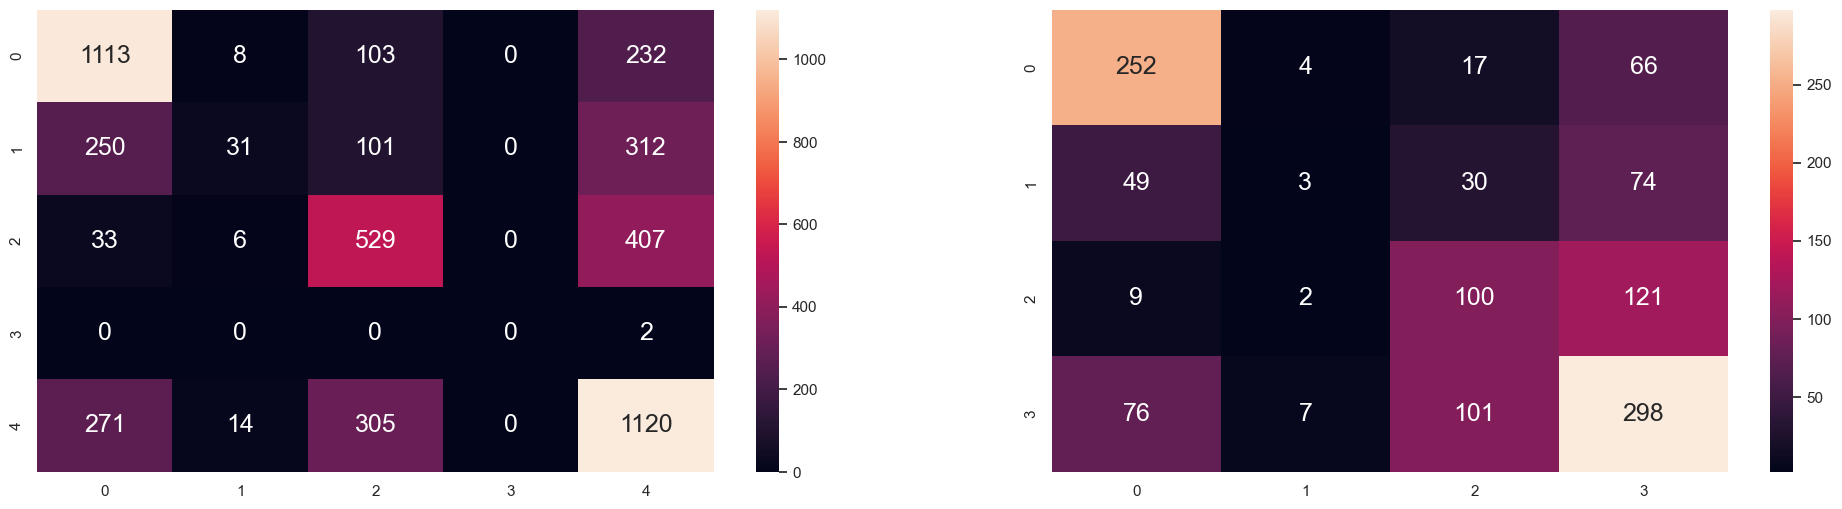

In [38]:
gegs_train = pd.DataFrame(train[['Genre','Global_Sales']])
gegs_test = pd.DataFrame(test[['Genre','Global_Sales']])
type(gegs_train)
gegs_train['Genre'].replace(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'],[0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)

gegs_test['Genre'].replace(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'],[0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)

dectree2.fit(gegs_train,ra_train)

dot_data2 = export_graphviz(dectree2, out_file=None, 
                                feature_names = gegs_train.columns,
                                filled=True,
                               class_names=['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'])

train_pred2 = dectree2.predict(gegs_train)
test_pred2 = dectree2.predict(gegs_test)
print("Train Classification Accuracy:",dectree2.score(gegs_train,ra_train))
print("Test Classification Accuracy:",dectree2.score(gegs_test,ra_test))
f, axes = plt.subplots(1, 2, figsize=(24, 6))
train_m = confusion_matrix(ra_train,train_pred2)
test_m = confusion_matrix(ra_test,test_pred2)
sb.heatmap(train_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sb.heatmap(test_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])
plt.show()

### 4.Logistic Function

Predicting Rating by global sales

In [43]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
scaler = StandardScaler()
gegs_train_scaled = scaler.fit_transform(gegs_train)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(gegs_train,ra_train.values.ravel())

In [40]:
#predicitng
ra_pred = logreg.predict(gegs_test)

Measuring the performance using this four metrics
1.accuracy = (TP + TN) / (TP + TN + FP + FN)
    This metric measures the proportion of correctly classified samples over the total number of samples
2.precision = TP / (TP + FP)
    This metric measures the proportion of true positives over the total number of positive predictions
3.recall = TP / (TP + FN)
    This metric measures the proportion of true positives over the total number of positive samples. 
4.F1 = 2 * (precision * recall) / (precision + recall)
    This metric is the harmonic mean of precision and recall, and it provides a balanced measure of both metrics

In [41]:
#Measuring the Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(gegs_test, ra_pred)
precision = precision_score(gegs_test, ra_pred, average='macro')
recall = recall_score(gegs_test, ra_pred, average='macro')
f1 = f1_score(gegs_test, ra_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

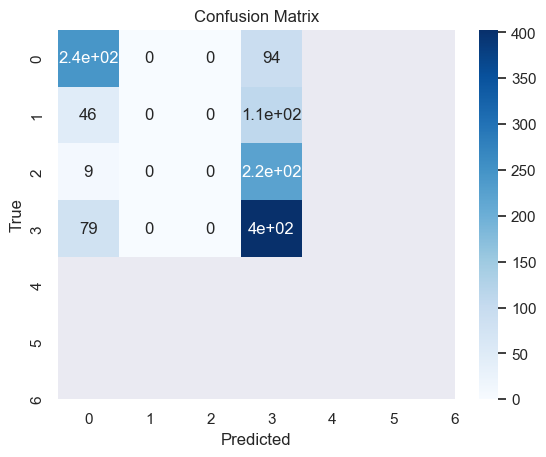

In [44]:
import seaborn as sns
cm = confusion_matrix(ra_test, ra_pred)

# Define the labels for the confusion matrix
labels = ['0', '1', '2', '3', '4', '5','6']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

### 5. Light GBM Model

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.
We will use the Light GBM model to predict the global sales of the video games based on the other features.

In [ ]:
pip install lightgbm

In [ ]:
from sklearn.model_selection import KFold
import lightgbm as lgb
import datetime
import time

In [ ]:
videoGamesSelectedCleaned.info()

In [ ]:
LGBMds=videoGamesSelectedCleaned.copy() # added in

In [ ]:
videoGamesSelectedCleaned.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an encoder object
encoder = OneHotEncoder()

# Select the categorical columns to encode
cat_cols = ['Genre', 'Rating']

# Fit the encoder on the categorical columns
encoder.fit(LGBMds[cat_cols])#videoGamesSelectedCleaned[cat_cols]

# Transform the categorical columns into a one-hot encoded matrix
onehot = encoder.transform(LGBMds[cat_cols]).toarray()#videoGamesSelectedCleaned[cat_cols]

# Create a DataFrame with the one-hot encoded columns
onehot_df = pd.DataFrame(onehot, columns=encoder.get_feature_names(cat_cols))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
videoGamesSelectedCleaned_encoded = pd.concat([LGBMds, onehot_df], axis=1)#videoGamesSelectedCleaned

# Drop the original categorical columns from the DataFrame
videoGamesSelectedCleaned_encoded.drop(cat_cols, axis=1, inplace=True)

# train-test split
X_train, X_test = train_test_split(videoGamesSelectedCleaned_encoded, test_size=0.2, random_state=42)

gbm_train = pd.DataFrame(X_train[['Genre','Critic_Score','User_Score','Rating', 'Global_Sales']])
gbm_test = pd.DataFrame(X_test[['Genre','Critic_Score','User_Score','Rating', 'Global_Sales']])
gbm_target = pd.DataFrame(gbm_train['Global_Sales'])
del gbm_train['Global_Sales']

features = [c for c in gbm_train.columns if c not in ['Global_Sales']]
categorical_features = ['Genre', 'Rating']

In [ ]:
videoGamesSelectedCleaned.head()

We then set the hyperparameters of the LGBM model, these parameters are obtained by an bayesian optimization.

In [ ]:
# set the hyperparameters of the LGBM model
param = {'num_leavs' : 111,
         'min_data_in_leaf' : 149,
         'objective' : 'regression',
         'max_depth' : 9,
         'learning_rate' : 0.005,
         'boosting' : 'gbdt',
         'feature_fraction' : 0.7522,
         'bagging_freq' : 1,
         'bagging_fraction' : 0.7083,
         'bagging_seed' : 11,
         'metric' : 'rmse',
         'lambda_l1' : 0.2634,
         'random_state' : 133,
         'verbosity' : -1
         }

In [ ]:
videoGamesSelectedCleaned.head()

While training the model, we use a standard KFold split of the dataset in order to validate the results and to stop the training.

In [ ]:
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(gbm_train))
predictions = np.zeros(len(gbm_test))
start = time.time()
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(gbm_train.values, gbm_target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(gbm_train.iloc[trn_idx][features],
                           label=gbm_target.iloc[trn_idx],
                           categorical_feature=categorical_features
                           )
    val_data = lgb.Dataset(gbm_train.iloc[val_idx][features],
                           label=gbm_target.iloc[val_idx],
                           categorical_feature=categorical_features
                           )

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 200)
    oof[val_idx] = clf.predict(gbm_train.iloc[val_idx][features], num_iteration=clf.best_iteration)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions += clf.predict(gbm_test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(mean_squared_error(oof, gbm_target)**0.5))

In [ ]:
videoGamesSelectedCleaned.head()

In [ ]:
from sklearn.metrics import mean_absolute_error

print("Root Mean Squared Error (RMSE) \t: {}".format(mean_squared_error(predictions, gbm_test['Global_Sales'])**0.5))
print("Mean Absolute Error (MAE) \t: {}".format(mean_absolute_error(predictions, gbm_test['Global_Sales'])))

In [ ]:
videoGamesSelectedCleaned.head()

### 6. SVM

In [ ]:
SVMds=videoGamesSelectedCleaned.copy() #replaced all videoGamesSelectedCleaned with SVMds

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Encode categorical features using LabelEncoder
le_genre = LabelEncoder()
le_rating = LabelEncoder()
SVMds['Genre'] = le_genre.fit_transform(SVMds['Genre'])#changed
SVMds['Rating'] = le_rating.fit_transform(SVMds['Rating'])#changed

# Split data into training and testing sets
X = SVMds[['Genre', 'Critic_Score', 'User_Score', 'Rating']]#changed
y = SVMds['Global_Sales']#changed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate model performance on testing data
y_pred = svm.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print('R-squared score:', r2)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

In [ ]:
videoGamesSelectedCleaned.head()

A negative R-squared score means that the model is performing worse than a simple horizontal line (a model that always predicts the mean of the target variable). This is because the SVM model is not able to capture the non-linear relationship between the features and the target variable. We can try to improve the model performance by using a non-linear kernel.

### 7. Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(videoGamesSelectedCleaned[['Genre','Critic_Score','User_Score', 'Rating']],
                                                    videoGamesSelectedCleaned['Global_Sales'], test_size=0.3, random_state=42)

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['Critic_Score', 'User_Score']),
        ('cat', categorical_transformer, ['Genre', 'Rating'])
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Step 4: Create a random forest model
rf_model = RandomForestRegressor(n_estimators=100)

# Step 5: Train the random forest model
rf_model.fit(X_train_processed, y_train)

# Step 6: Test the random forest model
rf_predictions = rf_model.predict(X_test_processed)

# Step 7: Evaluate the random forest model
print('Random Forest model metrics:')
print('MSE:', mean_squared_error(y_test, rf_predictions))
print('MAE:', mean_absolute_error(y_test, rf_predictions))
print('R2:', r2_score(y_test, rf_predictions))


In [ ]:
videoGamesSelectedCleaned.head()

The model performs moderately well on the test data.
In this case, the MSE of 2.03 suggests that the model's predictions are on average off by about 2.03 million units of global sales.
The MAE of 0.71 suggests that the model's predictions are on average off by about 0.71 million units of global sales.
However,  the R^2 of 0.11 suggests that the model explains only a small portion of the variance in the target variable.

## 6. Additional Research Question

Assume that there is a Japan developer who wants tp publish a game in the global market, based on the data, what kind of game should he/she publish?
Nintendo is the largest game developer in Japan, therefore in our analysis, we will only consider the games published by Nintendo.

In [ ]:
# Select the games published by Nintendo
japan_data = videoGamesSelectedCleaned[videoGamesSelectedCleaned['Publisher'] == 'Nintendo']

In [ ]:
# View all the genres of the games published by Nintendo
japan_data['Genre'].unique()
japan_data.head()

There are total of 12 genres of games, we can try to combine some of them to make the analysis easier.
We can combine the genres of 'Fighting', 'Shooter', 'Sports', 'Racing' 'Action' into one genre 'Action'.
We can combine the genres of 'Puzzle', 'Simulation', 'Strategy' into one genre 'Puzzle'.
We can combine the genres of 'Role-Playing', 'Adventure' into one genre 'Adventure'.

In [ ]:
# Merge the genres into 4 categories
japan_data['Genre'] = japan_data['Genre'].replace(['Fighting', 'Shooter', 'Sports', 'Racing', 'Action'], 'Action')
japan_data['Genre'] = japan_data['Genre'].replace(['Puzzle', 'Simulation', 'Strategy'], 'Puzzle')
japan_data['Genre'] = japan_data['Genre'].replace(['Role-Playing', 'Adventure'], 'Adventure')

# View the new genres
japan_count = pd.DataFrame()
japan_count = japan_data.loc[:,'Genre'].value_counts()
japan_count = japan_count.to_frame()
japan_count['Game Genre'] = japan_count.index
japan_count = japan_count.rename(columns = {'Genre' : 'Count'})

plt.figure(figsize=(18, 15))
sb.set(font_scale = 1)
sb.barplot(data = japan_count, x = 'Count', y = 'Game Genre')
plt.show()

From the bar plot, we can see that the most popular genre of games published by Nintendo is 'Action' games, followed by 'Puzzle' games and 'Adventure' games.

Then, we move on to find the correlation between japan sales and global sales.

In [ ]:
NA_Global=japan_data[['JP_Sales','Global_Sales']]
NA_Global.corr()

The correlation between Japan sales and global sales is 0.738, which is a strong positive correlation.

Then, we can convert the genre of the games into dummy variables, such that genre can be converted as a numeric variable.

In [ ]:
japan_data.head()

In [ ]:
japan_data = pd.get_dummies(japan_data, columns=['Genre'])
japan_data.head()

In [ ]:
japan_data.info()

#### For the best Global Sales:

In [ ]:
y = pd.DataFrame(japan_data["Global_Sales"])
X = pd.DataFrame(japan_data[['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']])

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y, orient = "h", ax = axes[0])
sb.histplot(data = y, ax = axes[1])
sb.violinplot(data = y, orient = "h", ax = axes[2])

In [ ]:
y.skew()

#### Reduce skew using log transform:

In [ ]:
y=np.log(y)
y.skew()

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y, orient = "h", ax = axes[0])
sb.histplot(data = y, ax = axes[1])
sb.violinplot(data = y, orient = "h", ax = axes[2])

#### Train test split:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

In [ ]:
linreg.fit(X_train,y_train)

In [ ]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

In [ ]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

y_train_pred=linreg.predict(X_train)
y_test_pred=linreg.predict(X_test)

#transform it back
y_train=np.exp(y_train)
y_train_pred=np.exp(y_train_pred)
y_test=np.exp(y_test)
y_test_pred=np.exp(y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

#### Genres all together do not help in predicting GlobalSales (Low explained variance, high MSE)

In [ ]:
for var in X:
    GenreSales=japan_data[[var,'Global_Sales']]
    print(GenreSales.corr())

Possibly because correlation between globalSales and genres are all <0.15

#### How about using genres to predict user/critic scores?

In [ ]:
for var in X:
    GenreSales=japan_data[[var,'Critic_Score']]
    print(GenreSales.corr())

In [ ]:
for var in X:
    GenreSales=japan_data[[var,'User_Score']]
    print(GenreSales.corr())

#### GenreMisc has a -0.3/-0.25 correlation to User/Critic score respectively, worth checking out.

#### For UserScore:

In [ ]:
y = pd.DataFrame(japan_data["User_Score"])
X = pd.DataFrame(japan_data[['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']])
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y, orient = "h", ax = axes[0])
sb.histplot(data = y, ax = axes[1])
sb.violinplot(data = y, orient = "h", ax = axes[2])
y

#### Normalise with cube

In [ ]:
y=np.power(y,3)
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y, orient = "h", ax = axes[0])
sb.histplot(data = y, ax = axes[1])
sb.violinplot(data = y, orient = "h", ax = axes[2])

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

linreg.fit(X_train,y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])


In [ ]:
y_train

In [ ]:
y_train_pred=linreg.predict(X_train)
y_test_pred=linreg.predict(X_test)

#transform it back
y_train=np.cbrt(y_train)
y_train_pred=np.cbrt(y_train_pred)
y_test=np.cbrt(y_test)
y_test_pred=np.cbrt(y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()
y_train

#### These are pretty bad too, with the R^2 values negative, suggesting that the model is performing worse than the naive model. Lets try just focussing on GenreMisc

In [ ]:
y = pd.DataFrame(japan_data["User_Score"])
X = pd.DataFrame(japan_data['Genre_Misc'])
#normalise
y=np.power(y,3)
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y, orient = "h", ax = axes[0])
sb.histplot(data = y, ax = axes[1])
sb.violinplot(data = y, orient = "h", ax = axes[2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

linreg.fit(X_train,y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])


In [ ]:
y_train_pred=linreg.predict(X_train)
y_test_pred=linreg.predict(X_test)

#transform it back

y_train=np.cbrt(y_train)
y_train_pred=np.cbrt(y_train_pred)
y_test=np.cbrt(y_test)
y_test_pred=np.cbrt(y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

#### Ok... so something is clearly wrong here, we have a corr of -0.3 but r^2 of -39314714??? possibly an issue with the transformation of the response variable.

#### No normalisation

In [ ]:
y = pd.DataFrame(japan_data["User_Score"])
X = pd.DataFrame(japan_data['Genre_Misc'])

f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y, orient = "h", ax = axes[0])
sb.histplot(data = y, ax = axes[1])
sb.violinplot(data = y, orient = "h", ax = axes[2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

linreg.fit(X_train,y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

y_train_pred=linreg.predict(X_train)
y_test_pred=linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

#### Looks more like it, having y transformed to conform to normality seems to have backfired here. Possible reasons why are: overfitting caused by transforming variable with a power function or numerical instability. Since we are dealing with small numbers here, and we are attempting to cube then cuberoot the data (which the computer estimates), small (computational) estimation errors can cause big issues for the calculation of R^2 value or MSE due to the high sensitivity resultant from small magnitudes of data.

#### So back to removing outliers to make data more normal

In [ ]:
yX= pd.DataFrame(japan_data[["User_Score",'Genre_Misc']])
yX= removeOutliersIQR(yX,'User_Score')
y = pd.DataFrame(yX["User_Score"])
X = pd.DataFrame(yX['Genre_Misc'])


f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y, orient = "h", ax = axes[0])
sb.histplot(data = y, ax = axes[1])
sb.violinplot(data = y, orient = "h", ax = axes[2])

In [ ]:
def linear(y,X):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

    linreg.fit(X_train,y_train)

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Print the Coefficients against Predictors
    pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

    y_train_pred=linreg.predict(X_train)
    y_test_pred=linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

In [ ]:
linear(y,X)

In [ ]:
def allGenres(response):
    for x in ['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']:
        print(x)
        print()
        yX= pd.DataFrame(japan_data[[response,x]])
        yX=removeOutliersIQR(yX,response)
        y = pd.DataFrame(yX[response])
        X = pd.DataFrame(yX[x])
        linear(y,X)
        print()

In [ ]:
allGenres('User_Score')

#### here we see that only GenreMisc is somewhat significant, with >0.05 explained varience, and a negative coefficient, suggesting that if the game developers want higher UserScores they should shy away from the Misc category.

In [ ]:
allGenres('Critic_Score')

#### Same for Critic score

In [ ]:
allGenres('Global_Sales')

#### For GlobalSales, we don't have any siginificant (past 0.05) findings on a Genre that might explain sufficient variance in the data, which is interesting because earlier, we managed to get a Classification accuracy of  >0.5 using Genres and GlobalSales to predict Ratings with a decision tree on the full dataset. (i.e. not just the japan/nintendo data) So we try with a decision tree, but later.

#### Reattempt the multivariable model

#### For GlobalSales:

In [ ]:
yX=removeOutliersIQR(japan_data,"Global_Sales")
y = pd.DataFrame(yX["Global_Sales"])
X = pd.DataFrame(yX[['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']])



In [ ]:
def multivariate(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

    linreg.fit(X_train,y_train)

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Print the Coefficients against Predictors
    pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

    y_train_pred=linreg.predict(X_train)
    y_test_pred=linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

In [ ]:
def fullMultivariate(response):
    yX=removeOutliersIQR(japan_data,response)
    y = pd.DataFrame(yX[response])
    X = pd.DataFrame(yX[['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']])
    multivariate(X,y)

In [ ]:
fullMultivariate('Global_Sales')

In [ ]:
fullMultivariate('User_Score')

In [ ]:
fullMultivariate('Critic_Score')

#### Here we see that using all genres to predict GlobalSales is somewhat successfully with an explained variance bordering 0.05 (actual: 0.046), while there are clear signs of overfitting in the case of User_Score and Critic_Score. This is the opposite of what we had when we analysed individual genres (Misc/~Misc predicts User_Score and Critic_score somewhat, but not so much GlobalSales). A possible reason for this is that the rest of the genres do not predict the Scores well, so adding them in results in overfitting of data, in contrast, the individual genres predict GlobalSales better on average, so although no specific Genre predicts GlobalSales well, we get a decent explained variance.

In [ ]:
var=japan_data[['Global_Sales','User_Score','Critic_Score','Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']]
#var=removeOutliersIQR(var,'Global_Sales')
var.corr()

#### Lets try with a decision tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
def tree(depth,X,y,labels):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)
    tree=DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train,y_train)
    f=plt.figure(figsize=(16,12))
    plot_tree(tree,rounded=True,filled=True,feature_names=['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle'],class_names=labels)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    f,axes=plt.subplots(1,2,figsize=(24,12))
    sb.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,annot_kws={'size':18},fmt=".0f",ax=axes[0])
    sb.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,annot_kws={'size':18},fmt=".0f",ax=axes[1])
    
    print("tree")
    print()
    print("Train")
    TP=confusion_matrix(y_train,y_train_pred)[1,1]
    TN=confusion_matrix(y_train,y_train_pred)[0,0]
    FP=confusion_matrix(y_train,y_train_pred)[0,1]
    FN=confusion_matrix(y_train,y_train_pred)[1,0]
    train_CA=tree.score(X_train,y_train)
    print("Classification Accuracy: ", train_CA)
    TPR_train=TP/(TP+FN)
    FPR_train=FP/(FP+TN)
    print("True Positive Rate: ",TPR_train)
    print("False Positive Rate: ",FPR_train)

    print()
    print("Test")
    TP=confusion_matrix(y_test,y_test_pred)[1,1]
    TN=confusion_matrix(y_test,y_test_pred)[0,0]
    FP=confusion_matrix(y_test,y_test_pred)[0,1]
    FN=confusion_matrix(y_test,y_test_pred)[1,0]
    test_CA=tree.score(X_test,y_test)
    print("Classification Accuracy: ", test_CA)
    TPR_test=TP/(TP+FN)
    FPR_test=FP/(FP+TN)
    print("True Positive Rate: ",TPR_test)
    print("False Positive Rate: ",FPR_test)

In [ ]:
GS=videoGamesSelectedCleaned[['Global_Sales']]
GS.describe()

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(24, 6))
sb.boxplot(data = GS, orient = "h", ax = axes)

#### We categorise the global sales data with v. bad( <0.11  ), bad( 0.11<0.29  ), good( 0.29<0.75 ), and v. good ( 0.75< )

In [ ]:
def toCat(df):
    bins=[0,np.percentile(df,25),np.percentile(df,50),np.percentile(df,75),np.percentile(df,100)]
    labels=['V. bad', 'Bad', 'Good', 'V. good']
    df = pd.cut(df, bins=bins, labels=labels)
    return df

In [ ]:
yX=removeOutliersIQR(japan_data,"Global_Sales")
catY=toCat(yX['Global_Sales'])
y = pd.DataFrame(catY)
X = pd.DataFrame(yX[['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']])

tree(10,X,y,['V. bad', 'Bad', 'Good', 'V. good'])

#### not very meaningful/hard to interprete, split into 2 cat only instead.

In [ ]:
def simpleToCat(df):
    bins=[0,np.percentile(df,50),np.percentile(df,100)]
    labels=['Bad', 'Good']
    df = pd.cut(df, bins=bins, labels=labels)
    return df

In [ ]:
yX=removeOutliersIQR(japan_data,"Global_Sales")
catY=simpleToCat(yX['Global_Sales'])
y = pd.DataFrame(catY)
X = pd.DataFrame(yX[['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']])

tree(10,X,y,['Bad', 'Good'])

#### here we see that if the genre is not platform, Global Sales are generally predicted to be higher than the median Global Sales, if the genre is not puzzle, Global Sales are generally predicted to be lower than the median Global Sales (based on nodes with a "accuracy" > 60%). Which suggests that the game devs might want to shy away from platform games and lean more into games with puzzle elements.

#### now on user scores

In [ ]:
yX=removeOutliersIQR(japan_data,"User_Score")
catY=simpleToCat(yX['User_Score'])
y = pd.DataFrame(catY)
X = pd.DataFrame(yX[['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']])

tree(10,X,y,['Bad', 'Good'])

#### here we see that to get a higher user score, developers might not want to create a Misc game, but platformers and puzzle games tend to have a higher user score.

#### critic scores

In [ ]:
yX=removeOutliersIQR(japan_data,"Critic_Score")
catY=simpleToCat(yX['Critic_Score'])
y = pd.DataFrame(catY)
X = pd.DataFrame(yX[['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']])

tree(10,X,y,['Bad', 'Good'])

#### So to get good critic scores here we want not to create a Misc or adventure game, but a puzzle game is generally better received by the critics.

#### lets add rating to see if that helps

#### Global Sales

In [ ]:
def tree1(depth,X,y,labels):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)
    tree=DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train,y_train)
    f=plt.figure(figsize=(16,12))
    plot_tree(tree,filled=True,rounded=True,feature_names=['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle','E', 'T', 'E10+', 'M'],class_names=labels)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    f,axes=plt.subplots(1,2,figsize=(24,12))
    sb.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,annot_kws={'size':18},fmt=".0f",ax=axes[0])
    sb.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,annot_kws={'size':18},fmt=".0f",ax=axes[1])
    
    print("tree")
    print()
    print("Train")
    TP=confusion_matrix(y_train,y_train_pred)[1,1]
    TN=confusion_matrix(y_train,y_train_pred)[0,0]
    FP=confusion_matrix(y_train,y_train_pred)[0,1]
    FN=confusion_matrix(y_train,y_train_pred)[1,0]
    train_CA=tree.score(X_train,y_train)
    print("Classification Accuracy: ", train_CA)
    TPR_train=TP/(TP+FN)
    FPR_train=FP/(FP+TN)
    print("True Positive Rate: ",TPR_train)
    print("False Positive Rate: ",FPR_train)

    print()
    print("Test")
    TP=confusion_matrix(y_test,y_test_pred)[1,1]
    TN=confusion_matrix(y_test,y_test_pred)[0,0]
    FP=confusion_matrix(y_test,y_test_pred)[0,1]
    FN=confusion_matrix(y_test,y_test_pred)[1,0]
    test_CA=tree.score(X_test,y_test)
    print("Classification Accuracy: ", test_CA)
    TPR_test=TP/(TP+FN)
    FPR_test=FP/(FP+TN)
    print("True Positive Rate: ",TPR_test)
    print("False Positive Rate: ",FPR_test)

In [ ]:
tryWithRating=japan_data.copy()
japan_data['Rating'].unique()

In [ ]:
yX=removeOutliersIQR(tryWithRating,"Global_Sales")
catY=simpleToCat(yX['Global_Sales'])
y = pd.DataFrame(catY)
X = pd.DataFrame(yX[['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle','Rating']])
X= pd.get_dummies(X, columns=['Rating'])
tree1(10,X,y,['Bad', 'Good'])

#### So here we see some signs of overfitting, train accuracy was better than when we predicted without the rating category, but we see a drop from train to test accuracy, although when comparing with and without rating, test accuracies were similar. An advantage of the added category, however is that we now see more pure nodes. Looking only at nodes with a gini of 0.2 or less, if the game is not rated E, is of the action genre, and is rated E10+, it has lower than average global sales, so the developers might not want to make such a game. they might also not want to make a game not rated E and M, not of the action and platform genre for the same reasons.